In [80]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
import copy 
from statistics import mean,mode 
from itertools import combinations  
from sklearn.ensemble import GradientBoostingClassifier



CPU times: user 76 µs, sys: 0 ns, total: 76 µs
Wall time: 81.1 µs


In [2]:
df=pd.read_csv('60s_window_wrist_chest.csv',index_col=0)


In [3]:
features=df.columns.tolist()
features

removed = ['label']
for rem in removed:
    features.remove(rem)

features_with_sub=[]
features_with_sub[:]=features
removed = ['subject']
for rem in removed:
    features.remove(rem)

feature=features
print(len(feature))
len(features_with_sub)

sm = SMOTE(random_state=2)
X, y= sm.fit_sample(df[features_with_sub], df['label'])
df_new=pd.concat([pd.DataFrame(X,columns=features_with_sub),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

for i in range (len(list(df_new['subject']))):
    df_new['subject'][i] = min([2,3,4,5,6,7,8,9,10,11,13,14,15,16,17], key=lambda x:abs(x-df_new['subject'][i]))
df_new['subject']=df_new['subject'].astype(int)

p_d=pd.read_csv('personal_detail.csv',index_col=0)

df_new_1=df_new.merge(p_d,on='subject')
df_new_1

70


/home/sf/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,label,age,height,weight,gender_ female,coffee_today_YES,sport_today_YES,smoker_YES,feel_ill_today_YES,bmi
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,0,27,175,80,0,0,0,0,0,1
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,0,27,175,80,0,0,0,0,0,1
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,0,27,175,80,0,0,0,0,0,1
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,0,27,175,80,0,0,0,0,0,1
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,0,27,175,80,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.029484,0.002074,0.020918,0.053804,-0.004624,0.002074,-0.015439,0.017447,-0.000003,1.427082e-06,...,1,29,165,55,1,0,0,0,0,0
1244,0.032744,0.000516,0.029211,0.034857,-0.029334,0.000516,-0.031478,-0.025832,-0.000020,3.552867e-07,...,2,29,165,55,1,0,0,0,0,0
1245,0.030006,0.007051,0.002966,0.070357,-0.027424,0.007051,-0.067796,-0.000404,-0.000019,4.851210e-06,...,2,29,165,55,1,0,0,0,0,0
1246,0.031250,0.001534,0.027188,0.038575,-0.031250,0.001534,-0.038575,-0.027188,-0.000022,1.055452e-06,...,2,29,165,55,1,0,0,0,0,0


In [4]:
sel_fea = ['EDA_tonic_mean','EDA_smna_mean','EDA_tonic_min','EDA_phasic_mean','TEMP_std','BVP_peak_freq','smoker_YES','ACC_y_min','ACC_x_mean','weight','gender_ female','c_Temp_max','ACC_x_max','TEMP_mean',
          'c_ACC_y_std','net_acc_max','Resp_std']

# Train Test Trade-Off

In [21]:
# user_list = [2,3,4,5,6,7,8,9,10,11,13,14,15,16]
user_list = [17, 16, 15, 14, 13, 11, 10, 9, 8, 7, 6, 5, 4, 3]

In [6]:
best_acc = []
mean_acc = []
min_acc = []
local_accu = [] 

for user in user_list:
    local_acc = []
    
    print ("user in Train:"+str(user))
#     train=df_new_1[df_new_1['subject']<=user]
#     test=df_new_1[df_new_1['subject']>user]

    train=df_new_1[df_new_1['subject']>=user]
    test=df_new_1[df_new_1['subject']<user]

    scaler = Normalizer()
    scaled_data_train = scaler.fit_transform(train[sel_fea])
    scaled_data_test = scaler.transform(test[sel_fea])

    for i in range (101):
        print (i)
        clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
        clf.fit(scaled_data_train,train['label'])
        y_pred=clf.predict(scaled_data_test)
#         print (classification_report(test['label'],y_pred))

        rpt = classification_report(test['label'],y_pred,output_dict=True)['accuracy']
        local_acc.append(rpt)
    
    local_accu += local_acc
    best_acc.append(max(local_acc))
    mean_acc.append(mean(local_acc))
    min_acc.append(min(local_acc))
    print ("*"*10)
    print (best_acc)
    print ("*"*10)
        


user in Train:17
0


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


3


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4
5
6


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


7


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


8
9


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


10
11
12


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


13


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


14
15
16
17
18
19


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


20


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


21


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


22


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


23


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


24
25


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


26


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


27
28
29
30


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


31
32
33
34
35


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


36


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


37


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


38


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


39
40


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


41


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


42
43


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


44


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


45
46
47
48
49
50
51


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


52


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


53


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


54
55
56


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


57


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


58
59


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


60
61
62


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


63


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


64


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


65
66
67
68


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


69
70
71


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


72
73
74
75


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


76
77
78


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


79


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


80


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


81


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


82


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


83
84


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


85
86


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


87


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


88


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


89


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


90
91


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


92


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


93


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


94


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


95


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


96


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


97


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


98


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


99
100


/home/sf/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**********
[0.3153910849453322]
**********
user in Train:16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
**********
[0.3153910849453322, 0.6426642664266426]
**********
user in Train:15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
**********
[0.3153910849453322, 0.6426642664266426, 0.6429961089494164]
**********
user in Train:14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60

In [7]:
len (best_acc) == len([2,3,4,5,6,7,8,9,10,11,13,14,15,16])

True

In [8]:
mean_acc

[0.2158399187269442,
 0.6102075554090063,
 0.6229244519782717,
 0.6715563021001784,
 0.6541591213753204,
 0.6699891168741539,
 0.7111980965538415,
 0.7237391008540276,
 0.7405772424376196,
 0.757975797579758,
 0.7445003886054135,
 0.7181704085901548,
 0.734946828016135,
 0.8165016501650165]

In [22]:
plot_dict = {'no. of users in train':[i for i in range(1,len(user_list)+1)],'user':user_list, 'max_acc':best_acc,'mean_acc':mean_acc,'min_acc':min_acc,}
df_plot = pd.DataFrame(plot_dict) 
df_plot.to_csv('single_acc_4_class.csv')

# Visual

In [13]:
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [24]:
df_plot

,no. of users in train,user,max_acc,mean_acc,min_acc
0,1,17,0.315391,0.215840,0.130362
1,2,16,0.642664,0.610208,0.574257
2,3,15,0.642996,0.622924,0.603113
3,4,14,0.706006,0.671556,0.638567
4,5,13,0.681710,0.654159,0.614014
5,6,11,0.697051,0.669989,0.644772
6,7,10,0.731783,0.711198,0.693023
7,8,9,0.766727,0.723739,0.674503
8,9,8,0.774947,0.740577,0.702760
9,10,7,0.785714,0.757976,0.714286


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Number of Users in Train')]

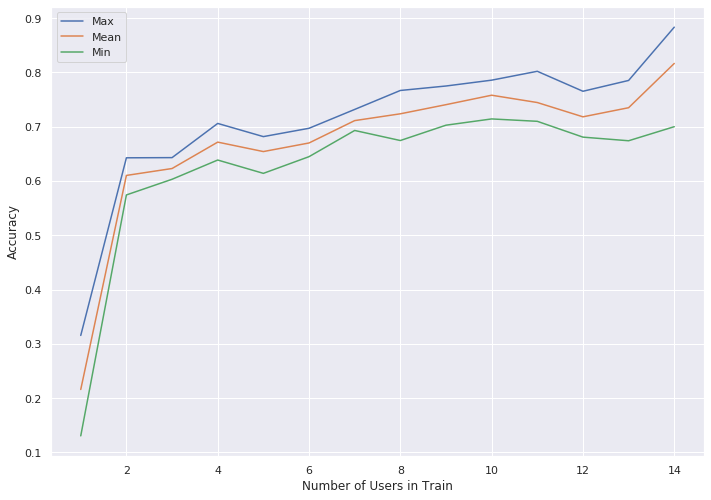

In [25]:
ax = sns.lineplot(x="no. of users in train", y="max_acc",data=df_plot ,label="Max")
ax = sns.lineplot(x="no. of users in train", y="mean_acc",data=df_plot ,label="Mean")
ax = sns.lineplot(x="no. of users in train", y="min_acc",data=df_plot ,label="Min")

ax.set(xlabel='Number of Users in Train', ylabel='Accuracy')

# Different Combination

train - different 8 users


test - different 7 users

In [5]:
user_list = [2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]

In [6]:
combi = combinations(user_list, 8) 

In [7]:
index = 1
subjects_in_train = []
subjects_in_test = []
best_acc = []
mean_acc = []
min_acc = []

acc = []

for c in list(combi):
    local_acc = []
    
    print (str(index)+" of 6435")
    train_sub = list(c)
    test_sub = list(set(user_list)-set(train_sub))
    print (train_sub,test_sub)
    
    train= df_new_1.loc[df_new_1.subject.isin(train_sub)]
    test= df_new_1.loc[df_new_1.subject.isin(test_sub)]
    
    scaler = Normalizer()
    scaled_data_train = scaler.fit_transform(train[sel_fea])
    scaled_data_test = scaler.transform(test[sel_fea])
    
    clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=None)
    clf.fit(scaled_data_train,train['label'])
    y_pred=clf.predict(scaled_data_test)
    #print (classification_report(test['label'],y_pred))

    rpt = classification_report(test['label'],y_pred,output_dict=True)['accuracy']
    
    acc.append(rpt)
    subjects_in_train.append(str(train_sub))
    subjects_in_test.append(str(test_sub))
    
#     for i in range (51):
#         print (i)
#         clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
#         clf.fit(scaled_data_train,train['label'])
#         y_pred=clf.predict(scaled_data_test)
# #         print (classification_report(test['label'],y_pred))

#         rpt = classification_report(test['label'],y_pred,output_dict=True)['accuracy']
#         local_acc.append(rpt)
    
#     best_acc.append(max(local_acc))
#     mean_acc.append(mean(local_acc))
#     min_acc.append(min(local_acc))
#     subjects_in_train.append(str(train_sub))
#     subjects_in_test.append(str(test_sub))
    
#     print ("*"*10)
#     print (acc)
#     print ("*"*10)
    
    index += 1
    


1 of 6435
[2, 3, 4, 5, 6, 7, 8, 9] [10, 11, 13, 14, 15, 16, 17]
2 of 6435
[2, 3, 4, 5, 6, 7, 8, 10] [9, 11, 13, 14, 15, 16, 17]
3 of 6435
[2, 3, 4, 5, 6, 7, 8, 11] [9, 10, 13, 14, 15, 16, 17]
4 of 6435
[2, 3, 4, 5, 6, 7, 8, 13] [9, 10, 11, 14, 15, 16, 17]
5 of 6435
[2, 3, 4, 5, 6, 7, 8, 14] [9, 10, 11, 13, 15, 16, 17]
6 of 6435
[2, 3, 4, 5, 6, 7, 8, 15] [9, 10, 11, 13, 14, 16, 17]
7 of 6435
[2, 3, 4, 5, 6, 7, 8, 16] [9, 10, 11, 13, 14, 15, 17]
8 of 6435
[2, 3, 4, 5, 6, 7, 8, 17] [9, 10, 11, 13, 14, 15, 16]
9 of 6435
[2, 3, 4, 5, 6, 7, 9, 10] [8, 11, 13, 14, 15, 16, 17]
10 of 6435
[2, 3, 4, 5, 6, 7, 9, 11] [8, 10, 13, 14, 15, 16, 17]
11 of 6435
[2, 3, 4, 5, 6, 7, 9, 13] [8, 10, 11, 14, 15, 16, 17]
12 of 6435
[2, 3, 4, 5, 6, 7, 9, 14] [8, 10, 11, 13, 15, 16, 17]
13 of 6435
[2, 3, 4, 5, 6, 7, 9, 15] [8, 10, 11, 13, 14, 16, 17]
14 of 6435
[2, 3, 4, 5, 6, 7, 9, 16] [8, 10, 11, 13, 14, 15, 17]
15 of 6435
[2, 3, 4, 5, 6, 7, 9, 17] [8, 10, 11, 13, 14, 15, 16]
16 of 6435
[2, 3, 4, 5, 6, 7, 10, 

127 of 6435
[2, 3, 4, 5, 7, 8, 9, 17] [6, 10, 11, 13, 14, 15, 16]
128 of 6435
[2, 3, 4, 5, 7, 8, 10, 11] [6, 9, 13, 14, 15, 16, 17]
129 of 6435
[2, 3, 4, 5, 7, 8, 10, 13] [6, 9, 11, 14, 15, 16, 17]
130 of 6435
[2, 3, 4, 5, 7, 8, 10, 14] [6, 9, 11, 13, 15, 16, 17]
131 of 6435
[2, 3, 4, 5, 7, 8, 10, 15] [6, 9, 11, 13, 14, 16, 17]
132 of 6435
[2, 3, 4, 5, 7, 8, 10, 16] [6, 9, 11, 13, 14, 15, 17]
133 of 6435
[2, 3, 4, 5, 7, 8, 10, 17] [6, 9, 11, 13, 14, 15, 16]
134 of 6435
[2, 3, 4, 5, 7, 8, 11, 13] [6, 9, 10, 14, 15, 16, 17]
135 of 6435
[2, 3, 4, 5, 7, 8, 11, 14] [6, 9, 10, 13, 15, 16, 17]
136 of 6435
[2, 3, 4, 5, 7, 8, 11, 15] [6, 9, 10, 13, 14, 16, 17]
137 of 6435
[2, 3, 4, 5, 7, 8, 11, 16] [6, 9, 10, 13, 14, 15, 17]
138 of 6435
[2, 3, 4, 5, 7, 8, 11, 17] [6, 9, 10, 13, 14, 15, 16]
139 of 6435
[2, 3, 4, 5, 7, 8, 13, 14] [6, 9, 10, 11, 15, 16, 17]
140 of 6435
[2, 3, 4, 5, 7, 8, 13, 15] [6, 9, 10, 11, 14, 16, 17]
141 of 6435
[2, 3, 4, 5, 7, 8, 13, 16] [6, 9, 10, 11, 14, 15, 17]
142 of 643

252 of 6435
[2, 3, 4, 5, 8, 13, 14, 16] [6, 7, 9, 10, 11, 15, 17]
253 of 6435
[2, 3, 4, 5, 8, 13, 14, 17] [6, 7, 9, 10, 11, 15, 16]
254 of 6435
[2, 3, 4, 5, 8, 13, 15, 16] [6, 7, 9, 10, 11, 14, 17]
255 of 6435
[2, 3, 4, 5, 8, 13, 15, 17] [6, 7, 9, 10, 11, 14, 16]
256 of 6435
[2, 3, 4, 5, 8, 13, 16, 17] [6, 7, 9, 10, 11, 14, 15]
257 of 6435
[2, 3, 4, 5, 8, 14, 15, 16] [6, 7, 9, 10, 11, 13, 17]
258 of 6435
[2, 3, 4, 5, 8, 14, 15, 17] [6, 7, 9, 10, 11, 13, 16]
259 of 6435
[2, 3, 4, 5, 8, 14, 16, 17] [6, 7, 9, 10, 11, 13, 15]
260 of 6435
[2, 3, 4, 5, 8, 15, 16, 17] [6, 7, 9, 10, 11, 13, 14]
261 of 6435
[2, 3, 4, 5, 9, 10, 11, 13] [6, 7, 8, 14, 15, 16, 17]
262 of 6435
[2, 3, 4, 5, 9, 10, 11, 14] [6, 7, 8, 13, 15, 16, 17]
263 of 6435
[2, 3, 4, 5, 9, 10, 11, 15] [6, 7, 8, 13, 14, 16, 17]
264 of 6435
[2, 3, 4, 5, 9, 10, 11, 16] [6, 7, 8, 13, 14, 15, 17]
265 of 6435
[2, 3, 4, 5, 9, 10, 11, 17] [6, 7, 8, 13, 14, 15, 16]
266 of 6435
[2, 3, 4, 5, 9, 10, 13, 14] [6, 7, 8, 11, 15, 16, 17]
267 of 643

377 of 6435
[2, 3, 4, 6, 7, 9, 15, 16] [5, 8, 10, 11, 13, 14, 17]
378 of 6435
[2, 3, 4, 6, 7, 9, 15, 17] [5, 8, 10, 11, 13, 14, 16]
379 of 6435
[2, 3, 4, 6, 7, 9, 16, 17] [5, 8, 10, 11, 13, 14, 15]
380 of 6435
[2, 3, 4, 6, 7, 10, 11, 13] [5, 8, 9, 14, 15, 16, 17]
381 of 6435
[2, 3, 4, 6, 7, 10, 11, 14] [5, 8, 9, 13, 15, 16, 17]
382 of 6435
[2, 3, 4, 6, 7, 10, 11, 15] [5, 8, 9, 13, 14, 16, 17]
383 of 6435
[2, 3, 4, 6, 7, 10, 11, 16] [5, 8, 9, 13, 14, 15, 17]
384 of 6435
[2, 3, 4, 6, 7, 10, 11, 17] [5, 8, 9, 13, 14, 15, 16]
385 of 6435
[2, 3, 4, 6, 7, 10, 13, 14] [5, 8, 9, 11, 15, 16, 17]
386 of 6435
[2, 3, 4, 6, 7, 10, 13, 15] [5, 8, 9, 11, 14, 16, 17]
387 of 6435
[2, 3, 4, 6, 7, 10, 13, 16] [5, 8, 9, 11, 14, 15, 17]
388 of 6435
[2, 3, 4, 6, 7, 10, 13, 17] [5, 8, 9, 11, 14, 15, 16]
389 of 6435
[2, 3, 4, 6, 7, 10, 14, 15] [5, 8, 9, 11, 13, 16, 17]
390 of 6435
[2, 3, 4, 6, 7, 10, 14, 16] [5, 8, 9, 11, 13, 15, 17]
391 of 6435
[2, 3, 4, 6, 7, 10, 14, 17] [5, 8, 9, 11, 13, 15, 16]
392 of 643

502 of 6435
[2, 3, 4, 6, 9, 14, 15, 16] [5, 7, 8, 10, 11, 13, 17]
503 of 6435
[2, 3, 4, 6, 9, 14, 15, 17] [5, 7, 8, 10, 11, 13, 16]
504 of 6435
[2, 3, 4, 6, 9, 14, 16, 17] [5, 7, 8, 10, 11, 13, 15]
505 of 6435
[2, 3, 4, 6, 9, 15, 16, 17] [5, 7, 8, 10, 11, 13, 14]
506 of 6435
[2, 3, 4, 6, 10, 11, 13, 14] [5, 7, 8, 9, 15, 16, 17]
507 of 6435
[2, 3, 4, 6, 10, 11, 13, 15] [5, 7, 8, 9, 14, 16, 17]
508 of 6435
[2, 3, 4, 6, 10, 11, 13, 16] [5, 7, 8, 9, 14, 15, 17]
509 of 6435
[2, 3, 4, 6, 10, 11, 13, 17] [5, 7, 8, 9, 14, 15, 16]
510 of 6435
[2, 3, 4, 6, 10, 11, 14, 15] [5, 7, 8, 9, 13, 16, 17]
511 of 6435
[2, 3, 4, 6, 10, 11, 14, 16] [5, 7, 8, 9, 13, 15, 17]
512 of 6435
[2, 3, 4, 6, 10, 11, 14, 17] [5, 7, 8, 9, 13, 15, 16]
513 of 6435
[2, 3, 4, 6, 10, 11, 15, 16] [5, 7, 8, 9, 13, 14, 17]
514 of 6435
[2, 3, 4, 6, 10, 11, 15, 17] [5, 7, 8, 9, 13, 14, 16]
515 of 6435
[2, 3, 4, 6, 10, 11, 16, 17] [5, 7, 8, 9, 13, 14, 15]
516 of 6435
[2, 3, 4, 6, 10, 13, 14, 15] [5, 7, 8, 9, 11, 16, 17]
517 of 643

627 of 6435
[2, 3, 4, 7, 9, 13, 16, 17] [5, 6, 8, 10, 11, 14, 15]
628 of 6435
[2, 3, 4, 7, 9, 14, 15, 16] [5, 6, 8, 10, 11, 13, 17]
629 of 6435
[2, 3, 4, 7, 9, 14, 15, 17] [5, 6, 8, 10, 11, 13, 16]
630 of 6435
[2, 3, 4, 7, 9, 14, 16, 17] [5, 6, 8, 10, 11, 13, 15]
631 of 6435
[2, 3, 4, 7, 9, 15, 16, 17] [5, 6, 8, 10, 11, 13, 14]
632 of 6435
[2, 3, 4, 7, 10, 11, 13, 14] [5, 6, 8, 9, 15, 16, 17]
633 of 6435
[2, 3, 4, 7, 10, 11, 13, 15] [5, 6, 8, 9, 14, 16, 17]
634 of 6435
[2, 3, 4, 7, 10, 11, 13, 16] [5, 6, 8, 9, 14, 15, 17]
635 of 6435
[2, 3, 4, 7, 10, 11, 13, 17] [5, 6, 8, 9, 14, 15, 16]
636 of 6435
[2, 3, 4, 7, 10, 11, 14, 15] [5, 6, 8, 9, 13, 16, 17]
637 of 6435
[2, 3, 4, 7, 10, 11, 14, 16] [5, 6, 8, 9, 13, 15, 17]
638 of 6435
[2, 3, 4, 7, 10, 11, 14, 17] [5, 6, 8, 9, 13, 15, 16]
639 of 6435
[2, 3, 4, 7, 10, 11, 15, 16] [5, 6, 8, 9, 13, 14, 17]
640 of 6435
[2, 3, 4, 7, 10, 11, 15, 17] [5, 6, 8, 9, 13, 14, 16]
641 of 6435
[2, 3, 4, 7, 10, 11, 16, 17] [5, 6, 8, 9, 13, 14, 15]
642 of 643

752 of 6435
[2, 3, 4, 9, 10, 13, 16, 17] [5, 6, 7, 8, 11, 14, 15]
753 of 6435
[2, 3, 4, 9, 10, 14, 15, 16] [5, 6, 7, 8, 11, 13, 17]
754 of 6435
[2, 3, 4, 9, 10, 14, 15, 17] [5, 6, 7, 8, 11, 13, 16]
755 of 6435
[2, 3, 4, 9, 10, 14, 16, 17] [5, 6, 7, 8, 11, 13, 15]
756 of 6435
[2, 3, 4, 9, 10, 15, 16, 17] [5, 6, 7, 8, 11, 13, 14]
757 of 6435
[2, 3, 4, 9, 11, 13, 14, 15] [5, 6, 7, 8, 10, 16, 17]
758 of 6435
[2, 3, 4, 9, 11, 13, 14, 16] [5, 6, 7, 8, 10, 15, 17]
759 of 6435
[2, 3, 4, 9, 11, 13, 14, 17] [5, 6, 7, 8, 10, 15, 16]
760 of 6435
[2, 3, 4, 9, 11, 13, 15, 16] [5, 6, 7, 8, 10, 14, 17]
761 of 6435
[2, 3, 4, 9, 11, 13, 15, 17] [5, 6, 7, 8, 10, 14, 16]
762 of 6435
[2, 3, 4, 9, 11, 13, 16, 17] [5, 6, 7, 8, 10, 14, 15]
763 of 6435
[2, 3, 4, 9, 11, 14, 15, 16] [5, 6, 7, 8, 10, 13, 17]
764 of 6435
[2, 3, 4, 9, 11, 14, 15, 17] [5, 6, 7, 8, 10, 13, 16]
765 of 6435
[2, 3, 4, 9, 11, 14, 16, 17] [5, 6, 7, 8, 10, 13, 15]
766 of 6435
[2, 3, 4, 9, 11, 15, 16, 17] [5, 6, 7, 8, 10, 13, 14]
767 of 643

877 of 6435
[2, 3, 5, 6, 8, 9, 10, 11] [4, 7, 13, 14, 15, 16, 17]
878 of 6435
[2, 3, 5, 6, 8, 9, 10, 13] [4, 7, 11, 14, 15, 16, 17]
879 of 6435
[2, 3, 5, 6, 8, 9, 10, 14] [4, 7, 11, 13, 15, 16, 17]
880 of 6435
[2, 3, 5, 6, 8, 9, 10, 15] [4, 7, 11, 13, 14, 16, 17]
881 of 6435
[2, 3, 5, 6, 8, 9, 10, 16] [4, 7, 11, 13, 14, 15, 17]
882 of 6435
[2, 3, 5, 6, 8, 9, 10, 17] [4, 7, 11, 13, 14, 15, 16]
883 of 6435
[2, 3, 5, 6, 8, 9, 11, 13] [4, 7, 10, 14, 15, 16, 17]
884 of 6435
[2, 3, 5, 6, 8, 9, 11, 14] [4, 7, 10, 13, 15, 16, 17]
885 of 6435
[2, 3, 5, 6, 8, 9, 11, 15] [4, 7, 10, 13, 14, 16, 17]
886 of 6435
[2, 3, 5, 6, 8, 9, 11, 16] [4, 7, 10, 13, 14, 15, 17]
887 of 6435
[2, 3, 5, 6, 8, 9, 11, 17] [4, 7, 10, 13, 14, 15, 16]
888 of 6435
[2, 3, 5, 6, 8, 9, 13, 14] [4, 7, 10, 11, 15, 16, 17]
889 of 6435
[2, 3, 5, 6, 8, 9, 13, 15] [4, 7, 10, 11, 14, 16, 17]
890 of 6435
[2, 3, 5, 6, 8, 9, 13, 16] [4, 7, 10, 11, 14, 15, 17]
891 of 6435
[2, 3, 5, 6, 8, 9, 13, 17] [4, 7, 10, 11, 14, 15, 16]
892 of 643

1002 of 6435
[2, 3, 5, 6, 14, 15, 16, 17] [4, 7, 8, 9, 10, 11, 13]
1003 of 6435
[2, 3, 5, 7, 8, 9, 10, 11] [4, 6, 13, 14, 15, 16, 17]
1004 of 6435
[2, 3, 5, 7, 8, 9, 10, 13] [4, 6, 11, 14, 15, 16, 17]
1005 of 6435
[2, 3, 5, 7, 8, 9, 10, 14] [4, 6, 11, 13, 15, 16, 17]
1006 of 6435
[2, 3, 5, 7, 8, 9, 10, 15] [4, 6, 11, 13, 14, 16, 17]
1007 of 6435
[2, 3, 5, 7, 8, 9, 10, 16] [4, 6, 11, 13, 14, 15, 17]
1008 of 6435
[2, 3, 5, 7, 8, 9, 10, 17] [4, 6, 11, 13, 14, 15, 16]
1009 of 6435
[2, 3, 5, 7, 8, 9, 11, 13] [4, 6, 10, 14, 15, 16, 17]
1010 of 6435
[2, 3, 5, 7, 8, 9, 11, 14] [4, 6, 10, 13, 15, 16, 17]
1011 of 6435
[2, 3, 5, 7, 8, 9, 11, 15] [4, 6, 10, 13, 14, 16, 17]
1012 of 6435
[2, 3, 5, 7, 8, 9, 11, 16] [4, 6, 10, 13, 14, 15, 17]
1013 of 6435
[2, 3, 5, 7, 8, 9, 11, 17] [4, 6, 10, 13, 14, 15, 16]
1014 of 6435
[2, 3, 5, 7, 8, 9, 13, 14] [4, 6, 10, 11, 15, 16, 17]
1015 of 6435
[2, 3, 5, 7, 8, 9, 13, 15] [4, 6, 10, 11, 14, 16, 17]
1016 of 6435
[2, 3, 5, 7, 8, 9, 13, 16] [4, 6, 10, 11, 14, 15,

1125 of 6435
[2, 3, 5, 7, 13, 14, 15, 17] [4, 6, 8, 9, 10, 11, 16]
1126 of 6435
[2, 3, 5, 7, 13, 14, 16, 17] [4, 6, 8, 9, 10, 11, 15]
1127 of 6435
[2, 3, 5, 7, 13, 15, 16, 17] [4, 6, 8, 9, 10, 11, 14]
1128 of 6435
[2, 3, 5, 7, 14, 15, 16, 17] [4, 6, 8, 9, 10, 11, 13]
1129 of 6435
[2, 3, 5, 8, 9, 10, 11, 13] [4, 6, 7, 14, 15, 16, 17]
1130 of 6435
[2, 3, 5, 8, 9, 10, 11, 14] [4, 6, 7, 13, 15, 16, 17]
1131 of 6435
[2, 3, 5, 8, 9, 10, 11, 15] [4, 6, 7, 13, 14, 16, 17]
1132 of 6435
[2, 3, 5, 8, 9, 10, 11, 16] [4, 6, 7, 13, 14, 15, 17]
1133 of 6435
[2, 3, 5, 8, 9, 10, 11, 17] [4, 6, 7, 13, 14, 15, 16]
1134 of 6435
[2, 3, 5, 8, 9, 10, 13, 14] [4, 6, 7, 11, 15, 16, 17]
1135 of 6435
[2, 3, 5, 8, 9, 10, 13, 15] [4, 6, 7, 11, 14, 16, 17]
1136 of 6435
[2, 3, 5, 8, 9, 10, 13, 16] [4, 6, 7, 11, 14, 15, 17]
1137 of 6435
[2, 3, 5, 8, 9, 10, 13, 17] [4, 6, 7, 11, 14, 15, 16]
1138 of 6435
[2, 3, 5, 8, 9, 10, 14, 15] [4, 6, 7, 11, 13, 16, 17]
1139 of 6435
[2, 3, 5, 8, 9, 10, 14, 16] [4, 6, 7, 11, 13, 15,

1248 of 6435
[2, 3, 5, 10, 14, 15, 16, 17] [4, 6, 7, 8, 9, 11, 13]
1249 of 6435
[2, 3, 5, 11, 13, 14, 15, 16] [4, 6, 7, 8, 9, 10, 17]
1250 of 6435
[2, 3, 5, 11, 13, 14, 15, 17] [4, 6, 7, 8, 9, 10, 16]
1251 of 6435
[2, 3, 5, 11, 13, 14, 16, 17] [4, 6, 7, 8, 9, 10, 15]
1252 of 6435
[2, 3, 5, 11, 13, 15, 16, 17] [4, 6, 7, 8, 9, 10, 14]
1253 of 6435
[2, 3, 5, 11, 14, 15, 16, 17] [4, 6, 7, 8, 9, 10, 13]
1254 of 6435
[2, 3, 5, 13, 14, 15, 16, 17] [4, 6, 7, 8, 9, 10, 11]
1255 of 6435
[2, 3, 6, 7, 8, 9, 10, 11] [4, 5, 13, 14, 15, 16, 17]
1256 of 6435
[2, 3, 6, 7, 8, 9, 10, 13] [4, 5, 11, 14, 15, 16, 17]
1257 of 6435
[2, 3, 6, 7, 8, 9, 10, 14] [4, 5, 11, 13, 15, 16, 17]
1258 of 6435
[2, 3, 6, 7, 8, 9, 10, 15] [4, 5, 11, 13, 14, 16, 17]
1259 of 6435
[2, 3, 6, 7, 8, 9, 10, 16] [4, 5, 11, 13, 14, 15, 17]
1260 of 6435
[2, 3, 6, 7, 8, 9, 10, 17] [4, 5, 11, 13, 14, 15, 16]
1261 of 6435
[2, 3, 6, 7, 8, 9, 11, 13] [4, 5, 10, 14, 15, 16, 17]
1262 of 6435
[2, 3, 6, 7, 8, 9, 11, 14] [4, 5, 10, 13, 15, 16,

1371 of 6435
[2, 3, 6, 7, 11, 13, 16, 17] [4, 5, 8, 9, 10, 14, 15]
1372 of 6435
[2, 3, 6, 7, 11, 14, 15, 16] [4, 5, 8, 9, 10, 13, 17]
1373 of 6435
[2, 3, 6, 7, 11, 14, 15, 17] [4, 5, 8, 9, 10, 13, 16]
1374 of 6435
[2, 3, 6, 7, 11, 14, 16, 17] [4, 5, 8, 9, 10, 13, 15]
1375 of 6435
[2, 3, 6, 7, 11, 15, 16, 17] [4, 5, 8, 9, 10, 13, 14]
1376 of 6435
[2, 3, 6, 7, 13, 14, 15, 16] [4, 5, 8, 9, 10, 11, 17]
1377 of 6435
[2, 3, 6, 7, 13, 14, 15, 17] [4, 5, 8, 9, 10, 11, 16]
1378 of 6435
[2, 3, 6, 7, 13, 14, 16, 17] [4, 5, 8, 9, 10, 11, 15]
1379 of 6435
[2, 3, 6, 7, 13, 15, 16, 17] [4, 5, 8, 9, 10, 11, 14]
1380 of 6435
[2, 3, 6, 7, 14, 15, 16, 17] [4, 5, 8, 9, 10, 11, 13]
1381 of 6435
[2, 3, 6, 8, 9, 10, 11, 13] [4, 5, 7, 14, 15, 16, 17]
1382 of 6435
[2, 3, 6, 8, 9, 10, 11, 14] [4, 5, 7, 13, 15, 16, 17]
1383 of 6435
[2, 3, 6, 8, 9, 10, 11, 15] [4, 5, 7, 13, 14, 16, 17]
1384 of 6435
[2, 3, 6, 8, 9, 10, 11, 16] [4, 5, 7, 13, 14, 15, 17]
1385 of 6435
[2, 3, 6, 8, 9, 10, 11, 17] [4, 5, 7, 13, 14, 15,

1494 of 6435
[2, 3, 6, 10, 11, 14, 16, 17] [4, 5, 7, 8, 9, 13, 15]
1495 of 6435
[2, 3, 6, 10, 11, 15, 16, 17] [4, 5, 7, 8, 9, 13, 14]
1496 of 6435
[2, 3, 6, 10, 13, 14, 15, 16] [4, 5, 7, 8, 9, 11, 17]
1497 of 6435
[2, 3, 6, 10, 13, 14, 15, 17] [4, 5, 7, 8, 9, 11, 16]
1498 of 6435
[2, 3, 6, 10, 13, 14, 16, 17] [4, 5, 7, 8, 9, 11, 15]
1499 of 6435
[2, 3, 6, 10, 13, 15, 16, 17] [4, 5, 7, 8, 9, 11, 14]
1500 of 6435
[2, 3, 6, 10, 14, 15, 16, 17] [4, 5, 7, 8, 9, 11, 13]
1501 of 6435
[2, 3, 6, 11, 13, 14, 15, 16] [4, 5, 7, 8, 9, 10, 17]
1502 of 6435
[2, 3, 6, 11, 13, 14, 15, 17] [4, 5, 7, 8, 9, 10, 16]
1503 of 6435
[2, 3, 6, 11, 13, 14, 16, 17] [4, 5, 7, 8, 9, 10, 15]
1504 of 6435
[2, 3, 6, 11, 13, 15, 16, 17] [4, 5, 7, 8, 9, 10, 14]
1505 of 6435
[2, 3, 6, 11, 14, 15, 16, 17] [4, 5, 7, 8, 9, 10, 13]
1506 of 6435
[2, 3, 6, 13, 14, 15, 16, 17] [4, 5, 7, 8, 9, 10, 11]
1507 of 6435
[2, 3, 7, 8, 9, 10, 11, 13] [4, 5, 6, 14, 15, 16, 17]
1508 of 6435
[2, 3, 7, 8, 9, 10, 11, 14] [4, 5, 6, 13, 15, 16,

1617 of 6435
[2, 3, 7, 10, 11, 13, 16, 17] [4, 5, 6, 8, 9, 14, 15]
1618 of 6435
[2, 3, 7, 10, 11, 14, 15, 16] [4, 5, 6, 8, 9, 13, 17]
1619 of 6435
[2, 3, 7, 10, 11, 14, 15, 17] [4, 5, 6, 8, 9, 13, 16]
1620 of 6435
[2, 3, 7, 10, 11, 14, 16, 17] [4, 5, 6, 8, 9, 13, 15]
1621 of 6435
[2, 3, 7, 10, 11, 15, 16, 17] [4, 5, 6, 8, 9, 13, 14]
1622 of 6435
[2, 3, 7, 10, 13, 14, 15, 16] [4, 5, 6, 8, 9, 11, 17]
1623 of 6435
[2, 3, 7, 10, 13, 14, 15, 17] [4, 5, 6, 8, 9, 11, 16]
1624 of 6435
[2, 3, 7, 10, 13, 14, 16, 17] [4, 5, 6, 8, 9, 11, 15]
1625 of 6435
[2, 3, 7, 10, 13, 15, 16, 17] [4, 5, 6, 8, 9, 11, 14]
1626 of 6435
[2, 3, 7, 10, 14, 15, 16, 17] [4, 5, 6, 8, 9, 11, 13]
1627 of 6435
[2, 3, 7, 11, 13, 14, 15, 16] [4, 5, 6, 8, 9, 10, 17]
1628 of 6435
[2, 3, 7, 11, 13, 14, 15, 17] [4, 5, 6, 8, 9, 10, 16]
1629 of 6435
[2, 3, 7, 11, 13, 14, 16, 17] [4, 5, 6, 8, 9, 10, 15]
1630 of 6435
[2, 3, 7, 11, 13, 15, 16, 17] [4, 5, 6, 8, 9, 10, 14]
1631 of 6435
[2, 3, 7, 11, 14, 15, 16, 17] [4, 5, 6, 8, 9, 10,

1740 of 6435
[2, 4, 5, 6, 7, 8, 14, 16] [3, 9, 10, 11, 13, 15, 17]
1741 of 6435
[2, 4, 5, 6, 7, 8, 14, 17] [3, 9, 10, 11, 13, 15, 16]
1742 of 6435
[2, 4, 5, 6, 7, 8, 15, 16] [3, 9, 10, 11, 13, 14, 17]
1743 of 6435
[2, 4, 5, 6, 7, 8, 15, 17] [3, 9, 10, 11, 13, 14, 16]
1744 of 6435
[2, 4, 5, 6, 7, 8, 16, 17] [3, 9, 10, 11, 13, 14, 15]
1745 of 6435
[2, 4, 5, 6, 7, 9, 10, 11] [3, 8, 13, 14, 15, 16, 17]
1746 of 6435
[2, 4, 5, 6, 7, 9, 10, 13] [3, 8, 11, 14, 15, 16, 17]
1747 of 6435
[2, 4, 5, 6, 7, 9, 10, 14] [3, 8, 11, 13, 15, 16, 17]
1748 of 6435
[2, 4, 5, 6, 7, 9, 10, 15] [3, 8, 11, 13, 14, 16, 17]
1749 of 6435
[2, 4, 5, 6, 7, 9, 10, 16] [3, 8, 11, 13, 14, 15, 17]
1750 of 6435
[2, 4, 5, 6, 7, 9, 10, 17] [3, 8, 11, 13, 14, 15, 16]
1751 of 6435
[2, 4, 5, 6, 7, 9, 11, 13] [3, 8, 10, 14, 15, 16, 17]
1752 of 6435
[2, 4, 5, 6, 7, 9, 11, 14] [3, 8, 10, 13, 15, 16, 17]
1753 of 6435
[2, 4, 5, 6, 7, 9, 11, 15] [3, 8, 10, 13, 14, 16, 17]
1754 of 6435
[2, 4, 5, 6, 7, 9, 11, 16] [3, 8, 10, 13, 14, 15,

1863 of 6435
[2, 4, 5, 6, 9, 10, 13, 15] [3, 7, 8, 11, 14, 16, 17]
1864 of 6435
[2, 4, 5, 6, 9, 10, 13, 16] [3, 7, 8, 11, 14, 15, 17]
1865 of 6435
[2, 4, 5, 6, 9, 10, 13, 17] [3, 7, 8, 11, 14, 15, 16]
1866 of 6435
[2, 4, 5, 6, 9, 10, 14, 15] [3, 7, 8, 11, 13, 16, 17]
1867 of 6435
[2, 4, 5, 6, 9, 10, 14, 16] [3, 7, 8, 11, 13, 15, 17]
1868 of 6435
[2, 4, 5, 6, 9, 10, 14, 17] [3, 7, 8, 11, 13, 15, 16]
1869 of 6435
[2, 4, 5, 6, 9, 10, 15, 16] [3, 7, 8, 11, 13, 14, 17]
1870 of 6435
[2, 4, 5, 6, 9, 10, 15, 17] [3, 7, 8, 11, 13, 14, 16]
1871 of 6435
[2, 4, 5, 6, 9, 10, 16, 17] [3, 7, 8, 11, 13, 14, 15]
1872 of 6435
[2, 4, 5, 6, 9, 11, 13, 14] [3, 7, 8, 10, 15, 16, 17]
1873 of 6435
[2, 4, 5, 6, 9, 11, 13, 15] [3, 7, 8, 10, 14, 16, 17]
1874 of 6435
[2, 4, 5, 6, 9, 11, 13, 16] [3, 7, 8, 10, 14, 15, 17]
1875 of 6435
[2, 4, 5, 6, 9, 11, 13, 17] [3, 7, 8, 10, 14, 15, 16]
1876 of 6435
[2, 4, 5, 6, 9, 11, 14, 15] [3, 7, 8, 10, 13, 16, 17]
1877 of 6435
[2, 4, 5, 6, 9, 11, 14, 16] [3, 7, 8, 10, 13, 15,

1986 of 6435
[2, 4, 5, 7, 9, 10, 11, 16] [3, 6, 8, 13, 14, 15, 17]
1987 of 6435
[2, 4, 5, 7, 9, 10, 11, 17] [3, 6, 8, 13, 14, 15, 16]
1988 of 6435
[2, 4, 5, 7, 9, 10, 13, 14] [3, 6, 8, 11, 15, 16, 17]
1989 of 6435
[2, 4, 5, 7, 9, 10, 13, 15] [3, 6, 8, 11, 14, 16, 17]
1990 of 6435
[2, 4, 5, 7, 9, 10, 13, 16] [3, 6, 8, 11, 14, 15, 17]
1991 of 6435
[2, 4, 5, 7, 9, 10, 13, 17] [3, 6, 8, 11, 14, 15, 16]
1992 of 6435
[2, 4, 5, 7, 9, 10, 14, 15] [3, 6, 8, 11, 13, 16, 17]
1993 of 6435
[2, 4, 5, 7, 9, 10, 14, 16] [3, 6, 8, 11, 13, 15, 17]
1994 of 6435
[2, 4, 5, 7, 9, 10, 14, 17] [3, 6, 8, 11, 13, 15, 16]
1995 of 6435
[2, 4, 5, 7, 9, 10, 15, 16] [3, 6, 8, 11, 13, 14, 17]
1996 of 6435
[2, 4, 5, 7, 9, 10, 15, 17] [3, 6, 8, 11, 13, 14, 16]
1997 of 6435
[2, 4, 5, 7, 9, 10, 16, 17] [3, 6, 8, 11, 13, 14, 15]
1998 of 6435
[2, 4, 5, 7, 9, 11, 13, 14] [3, 6, 8, 10, 15, 16, 17]
1999 of 6435
[2, 4, 5, 7, 9, 11, 13, 15] [3, 6, 8, 10, 14, 16, 17]
2000 of 6435
[2, 4, 5, 7, 9, 11, 13, 16] [3, 6, 8, 10, 14, 15,

2109 of 6435
[2, 4, 5, 8, 11, 13, 14, 16] [3, 6, 7, 9, 10, 15, 17]
2110 of 6435
[2, 4, 5, 8, 11, 13, 14, 17] [3, 6, 7, 9, 10, 15, 16]
2111 of 6435
[2, 4, 5, 8, 11, 13, 15, 16] [3, 6, 7, 9, 10, 14, 17]
2112 of 6435
[2, 4, 5, 8, 11, 13, 15, 17] [3, 6, 7, 9, 10, 14, 16]
2113 of 6435
[2, 4, 5, 8, 11, 13, 16, 17] [3, 6, 7, 9, 10, 14, 15]
2114 of 6435
[2, 4, 5, 8, 11, 14, 15, 16] [3, 6, 7, 9, 10, 13, 17]
2115 of 6435
[2, 4, 5, 8, 11, 14, 15, 17] [3, 6, 7, 9, 10, 13, 16]
2116 of 6435
[2, 4, 5, 8, 11, 14, 16, 17] [3, 6, 7, 9, 10, 13, 15]
2117 of 6435
[2, 4, 5, 8, 11, 15, 16, 17] [3, 6, 7, 9, 10, 13, 14]
2118 of 6435
[2, 4, 5, 8, 13, 14, 15, 16] [3, 6, 7, 9, 10, 11, 17]
2119 of 6435
[2, 4, 5, 8, 13, 14, 15, 17] [3, 6, 7, 9, 10, 11, 16]
2120 of 6435
[2, 4, 5, 8, 13, 14, 16, 17] [3, 6, 7, 9, 10, 11, 15]
2121 of 6435
[2, 4, 5, 8, 13, 15, 16, 17] [3, 6, 7, 9, 10, 11, 14]
2122 of 6435
[2, 4, 5, 8, 14, 15, 16, 17] [3, 6, 7, 9, 10, 11, 13]
2123 of 6435
[2, 4, 5, 9, 10, 11, 13, 14] [3, 6, 7, 8, 15, 16,

2232 of 6435
[2, 4, 6, 7, 8, 14, 15, 17] [3, 5, 9, 10, 11, 13, 16]
2233 of 6435
[2, 4, 6, 7, 8, 14, 16, 17] [3, 5, 9, 10, 11, 13, 15]
2234 of 6435
[2, 4, 6, 7, 8, 15, 16, 17] [3, 5, 9, 10, 11, 13, 14]
2235 of 6435
[2, 4, 6, 7, 9, 10, 11, 13] [3, 5, 8, 14, 15, 16, 17]
2236 of 6435
[2, 4, 6, 7, 9, 10, 11, 14] [3, 5, 8, 13, 15, 16, 17]
2237 of 6435
[2, 4, 6, 7, 9, 10, 11, 15] [3, 5, 8, 13, 14, 16, 17]
2238 of 6435
[2, 4, 6, 7, 9, 10, 11, 16] [3, 5, 8, 13, 14, 15, 17]
2239 of 6435
[2, 4, 6, 7, 9, 10, 11, 17] [3, 5, 8, 13, 14, 15, 16]
2240 of 6435
[2, 4, 6, 7, 9, 10, 13, 14] [3, 5, 8, 11, 15, 16, 17]
2241 of 6435
[2, 4, 6, 7, 9, 10, 13, 15] [3, 5, 8, 11, 14, 16, 17]
2242 of 6435
[2, 4, 6, 7, 9, 10, 13, 16] [3, 5, 8, 11, 14, 15, 17]
2243 of 6435
[2, 4, 6, 7, 9, 10, 13, 17] [3, 5, 8, 11, 14, 15, 16]
2244 of 6435
[2, 4, 6, 7, 9, 10, 14, 15] [3, 5, 8, 11, 13, 16, 17]
2245 of 6435
[2, 4, 6, 7, 9, 10, 14, 16] [3, 5, 8, 11, 13, 15, 17]
2246 of 6435
[2, 4, 6, 7, 9, 10, 14, 17] [3, 5, 8, 11, 13, 15,

2355 of 6435
[2, 4, 6, 8, 10, 13, 16, 17] [3, 5, 7, 9, 11, 14, 15]
2356 of 6435
[2, 4, 6, 8, 10, 14, 15, 16] [3, 5, 7, 9, 11, 13, 17]
2357 of 6435
[2, 4, 6, 8, 10, 14, 15, 17] [3, 5, 7, 9, 11, 13, 16]
2358 of 6435
[2, 4, 6, 8, 10, 14, 16, 17] [3, 5, 7, 9, 11, 13, 15]
2359 of 6435
[2, 4, 6, 8, 10, 15, 16, 17] [3, 5, 7, 9, 11, 13, 14]
2360 of 6435
[2, 4, 6, 8, 11, 13, 14, 15] [3, 5, 7, 9, 10, 16, 17]
2361 of 6435
[2, 4, 6, 8, 11, 13, 14, 16] [3, 5, 7, 9, 10, 15, 17]
2362 of 6435
[2, 4, 6, 8, 11, 13, 14, 17] [3, 5, 7, 9, 10, 15, 16]
2363 of 6435
[2, 4, 6, 8, 11, 13, 15, 16] [3, 5, 7, 9, 10, 14, 17]
2364 of 6435
[2, 4, 6, 8, 11, 13, 15, 17] [3, 5, 7, 9, 10, 14, 16]
2365 of 6435
[2, 4, 6, 8, 11, 13, 16, 17] [3, 5, 7, 9, 10, 14, 15]
2366 of 6435
[2, 4, 6, 8, 11, 14, 15, 16] [3, 5, 7, 9, 10, 13, 17]
2367 of 6435
[2, 4, 6, 8, 11, 14, 15, 17] [3, 5, 7, 9, 10, 13, 16]
2368 of 6435
[2, 4, 6, 8, 11, 14, 16, 17] [3, 5, 7, 9, 10, 13, 15]
2369 of 6435
[2, 4, 6, 8, 11, 15, 16, 17] [3, 5, 7, 9, 10, 13,

2478 of 6435
[2, 4, 7, 8, 10, 13, 14, 17] [3, 5, 6, 9, 11, 15, 16]
2479 of 6435
[2, 4, 7, 8, 10, 13, 15, 16] [3, 5, 6, 9, 11, 14, 17]
2480 of 6435
[2, 4, 7, 8, 10, 13, 15, 17] [3, 5, 6, 9, 11, 14, 16]
2481 of 6435
[2, 4, 7, 8, 10, 13, 16, 17] [3, 5, 6, 9, 11, 14, 15]
2482 of 6435
[2, 4, 7, 8, 10, 14, 15, 16] [3, 5, 6, 9, 11, 13, 17]
2483 of 6435
[2, 4, 7, 8, 10, 14, 15, 17] [3, 5, 6, 9, 11, 13, 16]
2484 of 6435
[2, 4, 7, 8, 10, 14, 16, 17] [3, 5, 6, 9, 11, 13, 15]
2485 of 6435
[2, 4, 7, 8, 10, 15, 16, 17] [3, 5, 6, 9, 11, 13, 14]
2486 of 6435
[2, 4, 7, 8, 11, 13, 14, 15] [3, 5, 6, 9, 10, 16, 17]
2487 of 6435
[2, 4, 7, 8, 11, 13, 14, 16] [3, 5, 6, 9, 10, 15, 17]
2488 of 6435
[2, 4, 7, 8, 11, 13, 14, 17] [3, 5, 6, 9, 10, 15, 16]
2489 of 6435
[2, 4, 7, 8, 11, 13, 15, 16] [3, 5, 6, 9, 10, 14, 17]
2490 of 6435
[2, 4, 7, 8, 11, 13, 15, 17] [3, 5, 6, 9, 10, 14, 16]
2491 of 6435
[2, 4, 7, 8, 11, 13, 16, 17] [3, 5, 6, 9, 10, 14, 15]
2492 of 6435
[2, 4, 7, 8, 11, 14, 15, 16] [3, 5, 6, 9, 10, 13,

2601 of 6435
[2, 4, 8, 10, 11, 15, 16, 17] [3, 5, 6, 7, 9, 13, 14]
2602 of 6435
[2, 4, 8, 10, 13, 14, 15, 16] [3, 5, 6, 7, 9, 11, 17]
2603 of 6435
[2, 4, 8, 10, 13, 14, 15, 17] [3, 5, 6, 7, 9, 11, 16]
2604 of 6435
[2, 4, 8, 10, 13, 14, 16, 17] [3, 5, 6, 7, 9, 11, 15]
2605 of 6435
[2, 4, 8, 10, 13, 15, 16, 17] [3, 5, 6, 7, 9, 11, 14]
2606 of 6435
[2, 4, 8, 10, 14, 15, 16, 17] [3, 5, 6, 7, 9, 11, 13]
2607 of 6435
[2, 4, 8, 11, 13, 14, 15, 16] [3, 5, 6, 7, 9, 10, 17]
2608 of 6435
[2, 4, 8, 11, 13, 14, 15, 17] [3, 5, 6, 7, 9, 10, 16]
2609 of 6435
[2, 4, 8, 11, 13, 14, 16, 17] [3, 5, 6, 7, 9, 10, 15]
2610 of 6435
[2, 4, 8, 11, 13, 15, 16, 17] [3, 5, 6, 7, 9, 10, 14]
2611 of 6435
[2, 4, 8, 11, 14, 15, 16, 17] [3, 5, 6, 7, 9, 10, 13]
2612 of 6435
[2, 4, 8, 13, 14, 15, 16, 17] [3, 5, 6, 7, 9, 10, 11]
2613 of 6435
[2, 4, 9, 10, 11, 13, 14, 15] [3, 5, 6, 7, 8, 16, 17]
2614 of 6435
[2, 4, 9, 10, 11, 13, 14, 16] [3, 5, 6, 7, 8, 15, 17]
2615 of 6435
[2, 4, 9, 10, 11, 13, 14, 17] [3, 5, 6, 7, 8, 15,

2724 of 6435
[2, 5, 6, 7, 9, 13, 14, 17] [3, 4, 8, 10, 11, 15, 16]
2725 of 6435
[2, 5, 6, 7, 9, 13, 15, 16] [3, 4, 8, 10, 11, 14, 17]
2726 of 6435
[2, 5, 6, 7, 9, 13, 15, 17] [3, 4, 8, 10, 11, 14, 16]
2727 of 6435
[2, 5, 6, 7, 9, 13, 16, 17] [3, 4, 8, 10, 11, 14, 15]
2728 of 6435
[2, 5, 6, 7, 9, 14, 15, 16] [3, 4, 8, 10, 11, 13, 17]
2729 of 6435
[2, 5, 6, 7, 9, 14, 15, 17] [3, 4, 8, 10, 11, 13, 16]
2730 of 6435
[2, 5, 6, 7, 9, 14, 16, 17] [3, 4, 8, 10, 11, 13, 15]
2731 of 6435
[2, 5, 6, 7, 9, 15, 16, 17] [3, 4, 8, 10, 11, 13, 14]
2732 of 6435
[2, 5, 6, 7, 10, 11, 13, 14] [3, 4, 8, 9, 15, 16, 17]
2733 of 6435
[2, 5, 6, 7, 10, 11, 13, 15] [3, 4, 8, 9, 14, 16, 17]
2734 of 6435
[2, 5, 6, 7, 10, 11, 13, 16] [3, 4, 8, 9, 14, 15, 17]
2735 of 6435
[2, 5, 6, 7, 10, 11, 13, 17] [3, 4, 8, 9, 14, 15, 16]
2736 of 6435
[2, 5, 6, 7, 10, 11, 14, 15] [3, 4, 8, 9, 13, 16, 17]
2737 of 6435
[2, 5, 6, 7, 10, 11, 14, 16] [3, 4, 8, 9, 13, 15, 17]
2738 of 6435
[2, 5, 6, 7, 10, 11, 14, 17] [3, 4, 8, 9, 13, 15,

2847 of 6435
[2, 5, 6, 9, 10, 13, 14, 15] [3, 4, 7, 8, 11, 16, 17]
2848 of 6435
[2, 5, 6, 9, 10, 13, 14, 16] [3, 4, 7, 8, 11, 15, 17]
2849 of 6435
[2, 5, 6, 9, 10, 13, 14, 17] [3, 4, 7, 8, 11, 15, 16]
2850 of 6435
[2, 5, 6, 9, 10, 13, 15, 16] [3, 4, 7, 8, 11, 14, 17]
2851 of 6435
[2, 5, 6, 9, 10, 13, 15, 17] [3, 4, 7, 8, 11, 14, 16]
2852 of 6435
[2, 5, 6, 9, 10, 13, 16, 17] [3, 4, 7, 8, 11, 14, 15]
2853 of 6435
[2, 5, 6, 9, 10, 14, 15, 16] [3, 4, 7, 8, 11, 13, 17]
2854 of 6435
[2, 5, 6, 9, 10, 14, 15, 17] [3, 4, 7, 8, 11, 13, 16]
2855 of 6435
[2, 5, 6, 9, 10, 14, 16, 17] [3, 4, 7, 8, 11, 13, 15]
2856 of 6435
[2, 5, 6, 9, 10, 15, 16, 17] [3, 4, 7, 8, 11, 13, 14]
2857 of 6435
[2, 5, 6, 9, 11, 13, 14, 15] [3, 4, 7, 8, 10, 16, 17]
2858 of 6435
[2, 5, 6, 9, 11, 13, 14, 16] [3, 4, 7, 8, 10, 15, 17]
2859 of 6435
[2, 5, 6, 9, 11, 13, 14, 17] [3, 4, 7, 8, 10, 15, 16]
2860 of 6435
[2, 5, 6, 9, 11, 13, 15, 16] [3, 4, 7, 8, 10, 14, 17]
2861 of 6435
[2, 5, 6, 9, 11, 13, 15, 17] [3, 4, 7, 8, 10, 14,

2970 of 6435
[2, 5, 7, 9, 10, 11, 15, 16] [3, 4, 6, 8, 13, 14, 17]
2971 of 6435
[2, 5, 7, 9, 10, 11, 15, 17] [3, 4, 6, 8, 13, 14, 16]
2972 of 6435
[2, 5, 7, 9, 10, 11, 16, 17] [3, 4, 6, 8, 13, 14, 15]
2973 of 6435
[2, 5, 7, 9, 10, 13, 14, 15] [3, 4, 6, 8, 11, 16, 17]
2974 of 6435
[2, 5, 7, 9, 10, 13, 14, 16] [3, 4, 6, 8, 11, 15, 17]
2975 of 6435
[2, 5, 7, 9, 10, 13, 14, 17] [3, 4, 6, 8, 11, 15, 16]
2976 of 6435
[2, 5, 7, 9, 10, 13, 15, 16] [3, 4, 6, 8, 11, 14, 17]
2977 of 6435
[2, 5, 7, 9, 10, 13, 15, 17] [3, 4, 6, 8, 11, 14, 16]
2978 of 6435
[2, 5, 7, 9, 10, 13, 16, 17] [3, 4, 6, 8, 11, 14, 15]
2979 of 6435
[2, 5, 7, 9, 10, 14, 15, 16] [3, 4, 6, 8, 11, 13, 17]
2980 of 6435
[2, 5, 7, 9, 10, 14, 15, 17] [3, 4, 6, 8, 11, 13, 16]
2981 of 6435
[2, 5, 7, 9, 10, 14, 16, 17] [3, 4, 6, 8, 11, 13, 15]
2982 of 6435
[2, 5, 7, 9, 10, 15, 16, 17] [3, 4, 6, 8, 11, 13, 14]
2983 of 6435
[2, 5, 7, 9, 11, 13, 14, 15] [3, 4, 6, 8, 10, 16, 17]
2984 of 6435
[2, 5, 7, 9, 11, 13, 14, 16] [3, 4, 6, 8, 10, 15,

3093 of 6435
[2, 5, 9, 11, 13, 15, 16, 17] [3, 4, 6, 7, 8, 10, 14]
3094 of 6435
[2, 5, 9, 11, 14, 15, 16, 17] [3, 4, 6, 7, 8, 10, 13]
3095 of 6435
[2, 5, 9, 13, 14, 15, 16, 17] [3, 4, 6, 7, 8, 10, 11]
3096 of 6435
[2, 5, 10, 11, 13, 14, 15, 16] [3, 4, 6, 7, 8, 9, 17]
3097 of 6435
[2, 5, 10, 11, 13, 14, 15, 17] [3, 4, 6, 7, 8, 9, 16]
3098 of 6435
[2, 5, 10, 11, 13, 14, 16, 17] [3, 4, 6, 7, 8, 9, 15]
3099 of 6435
[2, 5, 10, 11, 13, 15, 16, 17] [3, 4, 6, 7, 8, 9, 14]
3100 of 6435
[2, 5, 10, 11, 14, 15, 16, 17] [3, 4, 6, 7, 8, 9, 13]
3101 of 6435
[2, 5, 10, 13, 14, 15, 16, 17] [3, 4, 6, 7, 8, 9, 11]
3102 of 6435
[2, 5, 11, 13, 14, 15, 16, 17] [3, 4, 6, 7, 8, 9, 10]
3103 of 6435
[2, 6, 7, 8, 9, 10, 11, 13] [3, 4, 5, 14, 15, 16, 17]
3104 of 6435
[2, 6, 7, 8, 9, 10, 11, 14] [3, 4, 5, 13, 15, 16, 17]
3105 of 6435
[2, 6, 7, 8, 9, 10, 11, 15] [3, 4, 5, 13, 14, 16, 17]
3106 of 6435
[2, 6, 7, 8, 9, 10, 11, 16] [3, 4, 5, 13, 14, 15, 17]
3107 of 6435
[2, 6, 7, 8, 9, 10, 11, 17] [3, 4, 5, 13, 14, 15,

3216 of 6435
[2, 6, 7, 10, 11, 14, 16, 17] [3, 4, 5, 8, 9, 13, 15]
3217 of 6435
[2, 6, 7, 10, 11, 15, 16, 17] [3, 4, 5, 8, 9, 13, 14]
3218 of 6435
[2, 6, 7, 10, 13, 14, 15, 16] [3, 4, 5, 8, 9, 11, 17]
3219 of 6435
[2, 6, 7, 10, 13, 14, 15, 17] [3, 4, 5, 8, 9, 11, 16]
3220 of 6435
[2, 6, 7, 10, 13, 14, 16, 17] [3, 4, 5, 8, 9, 11, 15]
3221 of 6435
[2, 6, 7, 10, 13, 15, 16, 17] [3, 4, 5, 8, 9, 11, 14]
3222 of 6435
[2, 6, 7, 10, 14, 15, 16, 17] [3, 4, 5, 8, 9, 11, 13]
3223 of 6435
[2, 6, 7, 11, 13, 14, 15, 16] [3, 4, 5, 8, 9, 10, 17]
3224 of 6435
[2, 6, 7, 11, 13, 14, 15, 17] [3, 4, 5, 8, 9, 10, 16]
3225 of 6435
[2, 6, 7, 11, 13, 14, 16, 17] [3, 4, 5, 8, 9, 10, 15]
3226 of 6435
[2, 6, 7, 11, 13, 15, 16, 17] [3, 4, 5, 8, 9, 10, 14]
3227 of 6435
[2, 6, 7, 11, 14, 15, 16, 17] [3, 4, 5, 8, 9, 10, 13]
3228 of 6435
[2, 6, 7, 13, 14, 15, 16, 17] [3, 4, 5, 8, 9, 10, 11]
3229 of 6435
[2, 6, 8, 9, 10, 11, 13, 14] [3, 4, 5, 7, 15, 16, 17]
3230 of 6435
[2, 6, 8, 9, 10, 11, 13, 15] [3, 4, 5, 7, 14, 16,

3339 of 6435
[2, 7, 8, 9, 11, 14, 15, 16] [3, 4, 5, 6, 10, 13, 17]
3340 of 6435
[2, 7, 8, 9, 11, 14, 15, 17] [3, 4, 5, 6, 10, 13, 16]
3341 of 6435
[2, 7, 8, 9, 11, 14, 16, 17] [3, 4, 5, 6, 10, 13, 15]
3342 of 6435
[2, 7, 8, 9, 11, 15, 16, 17] [3, 4, 5, 6, 10, 13, 14]
3343 of 6435
[2, 7, 8, 9, 13, 14, 15, 16] [3, 4, 5, 6, 10, 11, 17]
3344 of 6435
[2, 7, 8, 9, 13, 14, 15, 17] [3, 4, 5, 6, 10, 11, 16]
3345 of 6435
[2, 7, 8, 9, 13, 14, 16, 17] [3, 4, 5, 6, 10, 11, 15]
3346 of 6435
[2, 7, 8, 9, 13, 15, 16, 17] [3, 4, 5, 6, 10, 11, 14]
3347 of 6435
[2, 7, 8, 9, 14, 15, 16, 17] [3, 4, 5, 6, 10, 11, 13]
3348 of 6435
[2, 7, 8, 10, 11, 13, 14, 15] [3, 4, 5, 6, 9, 16, 17]
3349 of 6435
[2, 7, 8, 10, 11, 13, 14, 16] [3, 4, 5, 6, 9, 15, 17]
3350 of 6435
[2, 7, 8, 10, 11, 13, 14, 17] [3, 4, 5, 6, 9, 15, 16]
3351 of 6435
[2, 7, 8, 10, 11, 13, 15, 16] [3, 4, 5, 6, 9, 14, 17]
3352 of 6435
[2, 7, 8, 10, 11, 13, 15, 17] [3, 4, 5, 6, 9, 14, 16]
3353 of 6435
[2, 7, 8, 10, 11, 13, 16, 17] [3, 4, 5, 6, 9, 14,

3462 of 6435
[3, 4, 5, 6, 7, 9, 10, 13] [2, 8, 11, 14, 15, 16, 17]
3463 of 6435
[3, 4, 5, 6, 7, 9, 10, 14] [2, 8, 11, 13, 15, 16, 17]
3464 of 6435
[3, 4, 5, 6, 7, 9, 10, 15] [2, 8, 11, 13, 14, 16, 17]
3465 of 6435
[3, 4, 5, 6, 7, 9, 10, 16] [2, 8, 11, 13, 14, 15, 17]
3466 of 6435
[3, 4, 5, 6, 7, 9, 10, 17] [2, 8, 11, 13, 14, 15, 16]
3467 of 6435
[3, 4, 5, 6, 7, 9, 11, 13] [2, 8, 10, 14, 15, 16, 17]
3468 of 6435
[3, 4, 5, 6, 7, 9, 11, 14] [2, 8, 10, 13, 15, 16, 17]
3469 of 6435
[3, 4, 5, 6, 7, 9, 11, 15] [2, 8, 10, 13, 14, 16, 17]
3470 of 6435
[3, 4, 5, 6, 7, 9, 11, 16] [2, 8, 10, 13, 14, 15, 17]
3471 of 6435
[3, 4, 5, 6, 7, 9, 11, 17] [2, 8, 10, 13, 14, 15, 16]
3472 of 6435
[3, 4, 5, 6, 7, 9, 13, 14] [2, 8, 10, 11, 15, 16, 17]
3473 of 6435
[3, 4, 5, 6, 7, 9, 13, 15] [2, 8, 10, 11, 14, 16, 17]
3474 of 6435
[3, 4, 5, 6, 7, 9, 13, 16] [2, 8, 10, 11, 14, 15, 17]
3475 of 6435
[3, 4, 5, 6, 7, 9, 13, 17] [2, 8, 10, 11, 14, 15, 16]
3476 of 6435
[3, 4, 5, 6, 7, 9, 14, 15] [2, 8, 10, 11, 13, 16,

3585 of 6435
[3, 4, 5, 6, 9, 10, 15, 16] [2, 7, 8, 11, 13, 14, 17]
3586 of 6435
[3, 4, 5, 6, 9, 10, 15, 17] [2, 7, 8, 11, 13, 14, 16]
3587 of 6435
[3, 4, 5, 6, 9, 10, 16, 17] [2, 7, 8, 11, 13, 14, 15]
3588 of 6435
[3, 4, 5, 6, 9, 11, 13, 14] [2, 7, 8, 10, 15, 16, 17]
3589 of 6435
[3, 4, 5, 6, 9, 11, 13, 15] [2, 7, 8, 10, 14, 16, 17]
3590 of 6435
[3, 4, 5, 6, 9, 11, 13, 16] [2, 7, 8, 10, 14, 15, 17]
3591 of 6435
[3, 4, 5, 6, 9, 11, 13, 17] [2, 7, 8, 10, 14, 15, 16]
3592 of 6435
[3, 4, 5, 6, 9, 11, 14, 15] [2, 7, 8, 10, 13, 16, 17]
3593 of 6435
[3, 4, 5, 6, 9, 11, 14, 16] [2, 7, 8, 10, 13, 15, 17]
3594 of 6435
[3, 4, 5, 6, 9, 11, 14, 17] [2, 7, 8, 10, 13, 15, 16]
3595 of 6435
[3, 4, 5, 6, 9, 11, 15, 16] [2, 7, 8, 10, 13, 14, 17]
3596 of 6435
[3, 4, 5, 6, 9, 11, 15, 17] [2, 7, 8, 10, 13, 14, 16]
3597 of 6435
[3, 4, 5, 6, 9, 11, 16, 17] [2, 7, 8, 10, 13, 14, 15]
3598 of 6435
[3, 4, 5, 6, 9, 13, 14, 15] [2, 7, 8, 10, 11, 16, 17]
3599 of 6435
[3, 4, 5, 6, 9, 13, 14, 16] [2, 7, 8, 10, 11, 15,

3708 of 6435
[3, 4, 5, 7, 9, 10, 14, 15] [2, 6, 8, 11, 13, 16, 17]
3709 of 6435
[3, 4, 5, 7, 9, 10, 14, 16] [2, 6, 8, 11, 13, 15, 17]
3710 of 6435
[3, 4, 5, 7, 9, 10, 14, 17] [2, 6, 8, 11, 13, 15, 16]
3711 of 6435
[3, 4, 5, 7, 9, 10, 15, 16] [2, 6, 8, 11, 13, 14, 17]
3712 of 6435
[3, 4, 5, 7, 9, 10, 15, 17] [2, 6, 8, 11, 13, 14, 16]
3713 of 6435
[3, 4, 5, 7, 9, 10, 16, 17] [2, 6, 8, 11, 13, 14, 15]
3714 of 6435
[3, 4, 5, 7, 9, 11, 13, 14] [2, 6, 8, 10, 15, 16, 17]
3715 of 6435
[3, 4, 5, 7, 9, 11, 13, 15] [2, 6, 8, 10, 14, 16, 17]
3716 of 6435
[3, 4, 5, 7, 9, 11, 13, 16] [2, 6, 8, 10, 14, 15, 17]
3717 of 6435
[3, 4, 5, 7, 9, 11, 13, 17] [2, 6, 8, 10, 14, 15, 16]
3718 of 6435
[3, 4, 5, 7, 9, 11, 14, 15] [2, 6, 8, 10, 13, 16, 17]
3719 of 6435
[3, 4, 5, 7, 9, 11, 14, 16] [2, 6, 8, 10, 13, 15, 17]
3720 of 6435
[3, 4, 5, 7, 9, 11, 14, 17] [2, 6, 8, 10, 13, 15, 16]
3721 of 6435
[3, 4, 5, 7, 9, 11, 15, 16] [2, 6, 8, 10, 13, 14, 17]
3722 of 6435
[3, 4, 5, 7, 9, 11, 15, 17] [2, 6, 8, 10, 13, 14,

3831 of 6435
[3, 4, 5, 8, 11, 14, 15, 17] [2, 6, 7, 9, 10, 13, 16]
3832 of 6435
[3, 4, 5, 8, 11, 14, 16, 17] [2, 6, 7, 9, 10, 13, 15]
3833 of 6435
[3, 4, 5, 8, 11, 15, 16, 17] [2, 6, 7, 9, 10, 13, 14]
3834 of 6435
[3, 4, 5, 8, 13, 14, 15, 16] [2, 6, 7, 9, 10, 11, 17]
3835 of 6435
[3, 4, 5, 8, 13, 14, 15, 17] [2, 6, 7, 9, 10, 11, 16]
3836 of 6435
[3, 4, 5, 8, 13, 14, 16, 17] [2, 6, 7, 9, 10, 11, 15]
3837 of 6435
[3, 4, 5, 8, 13, 15, 16, 17] [2, 6, 7, 9, 10, 11, 14]
3838 of 6435
[3, 4, 5, 8, 14, 15, 16, 17] [2, 6, 7, 9, 10, 11, 13]
3839 of 6435
[3, 4, 5, 9, 10, 11, 13, 14] [2, 6, 7, 8, 15, 16, 17]
3840 of 6435
[3, 4, 5, 9, 10, 11, 13, 15] [2, 6, 7, 8, 14, 16, 17]
3841 of 6435
[3, 4, 5, 9, 10, 11, 13, 16] [2, 6, 7, 8, 14, 15, 17]
3842 of 6435
[3, 4, 5, 9, 10, 11, 13, 17] [2, 6, 7, 8, 14, 15, 16]
3843 of 6435
[3, 4, 5, 9, 10, 11, 14, 15] [2, 6, 7, 8, 13, 16, 17]
3844 of 6435
[3, 4, 5, 9, 10, 11, 14, 16] [2, 6, 7, 8, 13, 15, 17]
3845 of 6435
[3, 4, 5, 9, 10, 11, 14, 17] [2, 6, 7, 8, 13, 15,

3954 of 6435
[3, 4, 6, 7, 9, 10, 11, 16] [2, 5, 8, 13, 14, 15, 17]
3955 of 6435
[3, 4, 6, 7, 9, 10, 11, 17] [2, 5, 8, 13, 14, 15, 16]
3956 of 6435
[3, 4, 6, 7, 9, 10, 13, 14] [2, 5, 8, 11, 15, 16, 17]
3957 of 6435
[3, 4, 6, 7, 9, 10, 13, 15] [2, 5, 8, 11, 14, 16, 17]
3958 of 6435
[3, 4, 6, 7, 9, 10, 13, 16] [2, 5, 8, 11, 14, 15, 17]
3959 of 6435
[3, 4, 6, 7, 9, 10, 13, 17] [2, 5, 8, 11, 14, 15, 16]
3960 of 6435
[3, 4, 6, 7, 9, 10, 14, 15] [2, 5, 8, 11, 13, 16, 17]
3961 of 6435
[3, 4, 6, 7, 9, 10, 14, 16] [2, 5, 8, 11, 13, 15, 17]
3962 of 6435
[3, 4, 6, 7, 9, 10, 14, 17] [2, 5, 8, 11, 13, 15, 16]
3963 of 6435
[3, 4, 6, 7, 9, 10, 15, 16] [2, 5, 8, 11, 13, 14, 17]
3964 of 6435
[3, 4, 6, 7, 9, 10, 15, 17] [2, 5, 8, 11, 13, 14, 16]
3965 of 6435
[3, 4, 6, 7, 9, 10, 16, 17] [2, 5, 8, 11, 13, 14, 15]
3966 of 6435
[3, 4, 6, 7, 9, 11, 13, 14] [2, 5, 8, 10, 15, 16, 17]
3967 of 6435
[3, 4, 6, 7, 9, 11, 13, 15] [2, 5, 8, 10, 14, 16, 17]
3968 of 6435
[3, 4, 6, 7, 9, 11, 13, 16] [2, 5, 8, 10, 14, 15,

4077 of 6435
[3, 4, 6, 8, 11, 13, 14, 16] [2, 5, 7, 9, 10, 15, 17]
4078 of 6435
[3, 4, 6, 8, 11, 13, 14, 17] [2, 5, 7, 9, 10, 15, 16]
4079 of 6435
[3, 4, 6, 8, 11, 13, 15, 16] [2, 5, 7, 9, 10, 14, 17]
4080 of 6435
[3, 4, 6, 8, 11, 13, 15, 17] [2, 5, 7, 9, 10, 14, 16]
4081 of 6435
[3, 4, 6, 8, 11, 13, 16, 17] [2, 5, 7, 9, 10, 14, 15]
4082 of 6435
[3, 4, 6, 8, 11, 14, 15, 16] [2, 5, 7, 9, 10, 13, 17]
4083 of 6435
[3, 4, 6, 8, 11, 14, 15, 17] [2, 5, 7, 9, 10, 13, 16]
4084 of 6435
[3, 4, 6, 8, 11, 14, 16, 17] [2, 5, 7, 9, 10, 13, 15]
4085 of 6435
[3, 4, 6, 8, 11, 15, 16, 17] [2, 5, 7, 9, 10, 13, 14]
4086 of 6435
[3, 4, 6, 8, 13, 14, 15, 16] [2, 5, 7, 9, 10, 11, 17]
4087 of 6435
[3, 4, 6, 8, 13, 14, 15, 17] [2, 5, 7, 9, 10, 11, 16]
4088 of 6435
[3, 4, 6, 8, 13, 14, 16, 17] [2, 5, 7, 9, 10, 11, 15]
4089 of 6435
[3, 4, 6, 8, 13, 15, 16, 17] [2, 5, 7, 9, 10, 11, 14]
4090 of 6435
[3, 4, 6, 8, 14, 15, 16, 17] [2, 5, 7, 9, 10, 11, 13]
4091 of 6435
[3, 4, 6, 9, 10, 11, 13, 14] [2, 5, 7, 8, 15, 16,

4200 of 6435
[3, 4, 7, 8, 10, 14, 16, 17] [2, 5, 6, 9, 11, 13, 15]
4201 of 6435
[3, 4, 7, 8, 10, 15, 16, 17] [2, 5, 6, 9, 11, 13, 14]
4202 of 6435
[3, 4, 7, 8, 11, 13, 14, 15] [2, 5, 6, 9, 10, 16, 17]
4203 of 6435
[3, 4, 7, 8, 11, 13, 14, 16] [2, 5, 6, 9, 10, 15, 17]
4204 of 6435
[3, 4, 7, 8, 11, 13, 14, 17] [2, 5, 6, 9, 10, 15, 16]
4205 of 6435
[3, 4, 7, 8, 11, 13, 15, 16] [2, 5, 6, 9, 10, 14, 17]
4206 of 6435
[3, 4, 7, 8, 11, 13, 15, 17] [2, 5, 6, 9, 10, 14, 16]
4207 of 6435
[3, 4, 7, 8, 11, 13, 16, 17] [2, 5, 6, 9, 10, 14, 15]
4208 of 6435
[3, 4, 7, 8, 11, 14, 15, 16] [2, 5, 6, 9, 10, 13, 17]
4209 of 6435
[3, 4, 7, 8, 11, 14, 15, 17] [2, 5, 6, 9, 10, 13, 16]
4210 of 6435
[3, 4, 7, 8, 11, 14, 16, 17] [2, 5, 6, 9, 10, 13, 15]
4211 of 6435
[3, 4, 7, 8, 11, 15, 16, 17] [2, 5, 6, 9, 10, 13, 14]
4212 of 6435
[3, 4, 7, 8, 13, 14, 15, 16] [2, 5, 6, 9, 10, 11, 17]
4213 of 6435
[3, 4, 7, 8, 13, 14, 15, 17] [2, 5, 6, 9, 10, 11, 16]
4214 of 6435
[3, 4, 7, 8, 13, 14, 16, 17] [2, 5, 6, 9, 10, 11,

4323 of 6435
[3, 4, 8, 11, 13, 14, 15, 16] [2, 5, 6, 7, 9, 10, 17]
4324 of 6435
[3, 4, 8, 11, 13, 14, 15, 17] [2, 5, 6, 7, 9, 10, 16]
4325 of 6435
[3, 4, 8, 11, 13, 14, 16, 17] [2, 5, 6, 7, 9, 10, 15]
4326 of 6435
[3, 4, 8, 11, 13, 15, 16, 17] [2, 5, 6, 7, 9, 10, 14]
4327 of 6435
[3, 4, 8, 11, 14, 15, 16, 17] [2, 5, 6, 7, 9, 10, 13]
4328 of 6435
[3, 4, 8, 13, 14, 15, 16, 17] [2, 5, 6, 7, 9, 10, 11]
4329 of 6435
[3, 4, 9, 10, 11, 13, 14, 15] [2, 5, 6, 7, 8, 16, 17]
4330 of 6435
[3, 4, 9, 10, 11, 13, 14, 16] [2, 5, 6, 7, 8, 15, 17]
4331 of 6435
[3, 4, 9, 10, 11, 13, 14, 17] [2, 5, 6, 7, 8, 15, 16]
4332 of 6435
[3, 4, 9, 10, 11, 13, 15, 16] [2, 5, 6, 7, 8, 14, 17]
4333 of 6435
[3, 4, 9, 10, 11, 13, 15, 17] [2, 5, 6, 7, 8, 14, 16]
4334 of 6435
[3, 4, 9, 10, 11, 13, 16, 17] [2, 5, 6, 7, 8, 14, 15]
4335 of 6435
[3, 4, 9, 10, 11, 14, 15, 16] [2, 5, 6, 7, 8, 13, 17]
4336 of 6435
[3, 4, 9, 10, 11, 14, 15, 17] [2, 5, 6, 7, 8, 13, 16]
4337 of 6435
[3, 4, 9, 10, 11, 14, 16, 17] [2, 5, 6, 7, 8, 13,

4446 of 6435
[3, 5, 6, 7, 9, 14, 16, 17] [2, 4, 8, 10, 11, 13, 15]
4447 of 6435
[3, 5, 6, 7, 9, 15, 16, 17] [2, 4, 8, 10, 11, 13, 14]
4448 of 6435
[3, 5, 6, 7, 10, 11, 13, 14] [2, 4, 8, 9, 15, 16, 17]
4449 of 6435
[3, 5, 6, 7, 10, 11, 13, 15] [2, 4, 8, 9, 14, 16, 17]
4450 of 6435
[3, 5, 6, 7, 10, 11, 13, 16] [2, 4, 8, 9, 14, 15, 17]
4451 of 6435
[3, 5, 6, 7, 10, 11, 13, 17] [2, 4, 8, 9, 14, 15, 16]
4452 of 6435
[3, 5, 6, 7, 10, 11, 14, 15] [2, 4, 8, 9, 13, 16, 17]
4453 of 6435
[3, 5, 6, 7, 10, 11, 14, 16] [2, 4, 8, 9, 13, 15, 17]
4454 of 6435
[3, 5, 6, 7, 10, 11, 14, 17] [2, 4, 8, 9, 13, 15, 16]
4455 of 6435
[3, 5, 6, 7, 10, 11, 15, 16] [2, 4, 8, 9, 13, 14, 17]
4456 of 6435
[3, 5, 6, 7, 10, 11, 15, 17] [2, 4, 8, 9, 13, 14, 16]
4457 of 6435
[3, 5, 6, 7, 10, 11, 16, 17] [2, 4, 8, 9, 13, 14, 15]
4458 of 6435
[3, 5, 6, 7, 10, 13, 14, 15] [2, 4, 8, 9, 11, 16, 17]
4459 of 6435
[3, 5, 6, 7, 10, 13, 14, 16] [2, 4, 8, 9, 11, 15, 17]
4460 of 6435
[3, 5, 6, 7, 10, 13, 14, 17] [2, 4, 8, 9, 11, 15,

4569 of 6435
[3, 5, 6, 9, 10, 14, 15, 16] [2, 4, 7, 8, 11, 13, 17]
4570 of 6435
[3, 5, 6, 9, 10, 14, 15, 17] [2, 4, 7, 8, 11, 13, 16]
4571 of 6435
[3, 5, 6, 9, 10, 14, 16, 17] [2, 4, 7, 8, 11, 13, 15]
4572 of 6435
[3, 5, 6, 9, 10, 15, 16, 17] [2, 4, 7, 8, 11, 13, 14]
4573 of 6435
[3, 5, 6, 9, 11, 13, 14, 15] [2, 4, 7, 8, 10, 16, 17]
4574 of 6435
[3, 5, 6, 9, 11, 13, 14, 16] [2, 4, 7, 8, 10, 15, 17]
4575 of 6435
[3, 5, 6, 9, 11, 13, 14, 17] [2, 4, 7, 8, 10, 15, 16]
4576 of 6435
[3, 5, 6, 9, 11, 13, 15, 16] [2, 4, 7, 8, 10, 14, 17]
4577 of 6435
[3, 5, 6, 9, 11, 13, 15, 17] [2, 4, 7, 8, 10, 14, 16]
4578 of 6435
[3, 5, 6, 9, 11, 13, 16, 17] [2, 4, 7, 8, 10, 14, 15]
4579 of 6435
[3, 5, 6, 9, 11, 14, 15, 16] [2, 4, 7, 8, 10, 13, 17]
4580 of 6435
[3, 5, 6, 9, 11, 14, 15, 17] [2, 4, 7, 8, 10, 13, 16]
4581 of 6435
[3, 5, 6, 9, 11, 14, 16, 17] [2, 4, 7, 8, 10, 13, 15]
4582 of 6435
[3, 5, 6, 9, 11, 15, 16, 17] [2, 4, 7, 8, 10, 13, 14]
4583 of 6435
[3, 5, 6, 9, 13, 14, 15, 16] [2, 4, 7, 8, 10, 11,

4692 of 6435
[3, 5, 7, 9, 10, 13, 15, 16] [2, 4, 6, 8, 11, 14, 17]
4693 of 6435
[3, 5, 7, 9, 10, 13, 15, 17] [2, 4, 6, 8, 11, 14, 16]
4694 of 6435
[3, 5, 7, 9, 10, 13, 16, 17] [2, 4, 6, 8, 11, 14, 15]
4695 of 6435
[3, 5, 7, 9, 10, 14, 15, 16] [2, 4, 6, 8, 11, 13, 17]
4696 of 6435
[3, 5, 7, 9, 10, 14, 15, 17] [2, 4, 6, 8, 11, 13, 16]
4697 of 6435
[3, 5, 7, 9, 10, 14, 16, 17] [2, 4, 6, 8, 11, 13, 15]
4698 of 6435
[3, 5, 7, 9, 10, 15, 16, 17] [2, 4, 6, 8, 11, 13, 14]
4699 of 6435
[3, 5, 7, 9, 11, 13, 14, 15] [2, 4, 6, 8, 10, 16, 17]
4700 of 6435
[3, 5, 7, 9, 11, 13, 14, 16] [2, 4, 6, 8, 10, 15, 17]
4701 of 6435
[3, 5, 7, 9, 11, 13, 14, 17] [2, 4, 6, 8, 10, 15, 16]
4702 of 6435
[3, 5, 7, 9, 11, 13, 15, 16] [2, 4, 6, 8, 10, 14, 17]
4703 of 6435
[3, 5, 7, 9, 11, 13, 15, 17] [2, 4, 6, 8, 10, 14, 16]
4704 of 6435
[3, 5, 7, 9, 11, 13, 16, 17] [2, 4, 6, 8, 10, 14, 15]
4705 of 6435
[3, 5, 7, 9, 11, 14, 15, 16] [2, 4, 6, 8, 10, 13, 17]
4706 of 6435
[3, 5, 7, 9, 11, 14, 15, 17] [2, 4, 6, 8, 10, 13,

4815 of 6435
[3, 5, 10, 11, 13, 15, 16, 17] [2, 4, 6, 7, 8, 9, 14]
4816 of 6435
[3, 5, 10, 11, 14, 15, 16, 17] [2, 4, 6, 7, 8, 9, 13]
4817 of 6435
[3, 5, 10, 13, 14, 15, 16, 17] [2, 4, 6, 7, 8, 9, 11]
4818 of 6435
[3, 5, 11, 13, 14, 15, 16, 17] [2, 4, 6, 7, 8, 9, 10]
4819 of 6435
[3, 6, 7, 8, 9, 10, 11, 13] [2, 4, 5, 14, 15, 16, 17]
4820 of 6435
[3, 6, 7, 8, 9, 10, 11, 14] [2, 4, 5, 13, 15, 16, 17]
4821 of 6435
[3, 6, 7, 8, 9, 10, 11, 15] [2, 4, 5, 13, 14, 16, 17]
4822 of 6435
[3, 6, 7, 8, 9, 10, 11, 16] [2, 4, 5, 13, 14, 15, 17]
4823 of 6435
[3, 6, 7, 8, 9, 10, 11, 17] [2, 4, 5, 13, 14, 15, 16]
4824 of 6435
[3, 6, 7, 8, 9, 10, 13, 14] [2, 4, 5, 11, 15, 16, 17]
4825 of 6435
[3, 6, 7, 8, 9, 10, 13, 15] [2, 4, 5, 11, 14, 16, 17]
4826 of 6435
[3, 6, 7, 8, 9, 10, 13, 16] [2, 4, 5, 11, 14, 15, 17]
4827 of 6435
[3, 6, 7, 8, 9, 10, 13, 17] [2, 4, 5, 11, 14, 15, 16]
4828 of 6435
[3, 6, 7, 8, 9, 10, 14, 15] [2, 4, 5, 11, 13, 16, 17]
4829 of 6435
[3, 6, 7, 8, 9, 10, 14, 16] [2, 4, 5, 11, 13, 15,

4938 of 6435
[3, 6, 7, 10, 14, 15, 16, 17] [2, 4, 5, 8, 9, 11, 13]
4939 of 6435
[3, 6, 7, 11, 13, 14, 15, 16] [2, 4, 5, 8, 9, 10, 17]
4940 of 6435
[3, 6, 7, 11, 13, 14, 15, 17] [2, 4, 5, 8, 9, 10, 16]
4941 of 6435
[3, 6, 7, 11, 13, 14, 16, 17] [2, 4, 5, 8, 9, 10, 15]
4942 of 6435
[3, 6, 7, 11, 13, 15, 16, 17] [2, 4, 5, 8, 9, 10, 14]
4943 of 6435
[3, 6, 7, 11, 14, 15, 16, 17] [2, 4, 5, 8, 9, 10, 13]
4944 of 6435
[3, 6, 7, 13, 14, 15, 16, 17] [2, 4, 5, 8, 9, 10, 11]
4945 of 6435
[3, 6, 8, 9, 10, 11, 13, 14] [2, 4, 5, 7, 15, 16, 17]
4946 of 6435
[3, 6, 8, 9, 10, 11, 13, 15] [2, 4, 5, 7, 14, 16, 17]
4947 of 6435
[3, 6, 8, 9, 10, 11, 13, 16] [2, 4, 5, 7, 14, 15, 17]
4948 of 6435
[3, 6, 8, 9, 10, 11, 13, 17] [2, 4, 5, 7, 14, 15, 16]
4949 of 6435
[3, 6, 8, 9, 10, 11, 14, 15] [2, 4, 5, 7, 13, 16, 17]
4950 of 6435
[3, 6, 8, 9, 10, 11, 14, 16] [2, 4, 5, 7, 13, 15, 17]
4951 of 6435
[3, 6, 8, 9, 10, 11, 14, 17] [2, 4, 5, 7, 13, 15, 16]
4952 of 6435
[3, 6, 8, 9, 10, 11, 15, 16] [2, 4, 5, 7, 13, 14,

5061 of 6435
[3, 7, 8, 9, 13, 14, 16, 17] [2, 4, 5, 6, 10, 11, 15]
5062 of 6435
[3, 7, 8, 9, 13, 15, 16, 17] [2, 4, 5, 6, 10, 11, 14]
5063 of 6435
[3, 7, 8, 9, 14, 15, 16, 17] [2, 4, 5, 6, 10, 11, 13]
5064 of 6435
[3, 7, 8, 10, 11, 13, 14, 15] [2, 4, 5, 6, 9, 16, 17]
5065 of 6435
[3, 7, 8, 10, 11, 13, 14, 16] [2, 4, 5, 6, 9, 15, 17]
5066 of 6435
[3, 7, 8, 10, 11, 13, 14, 17] [2, 4, 5, 6, 9, 15, 16]
5067 of 6435
[3, 7, 8, 10, 11, 13, 15, 16] [2, 4, 5, 6, 9, 14, 17]
5068 of 6435
[3, 7, 8, 10, 11, 13, 15, 17] [2, 4, 5, 6, 9, 14, 16]
5069 of 6435
[3, 7, 8, 10, 11, 13, 16, 17] [2, 4, 5, 6, 9, 14, 15]
5070 of 6435
[3, 7, 8, 10, 11, 14, 15, 16] [2, 4, 5, 6, 9, 13, 17]
5071 of 6435
[3, 7, 8, 10, 11, 14, 15, 17] [2, 4, 5, 6, 9, 13, 16]
5072 of 6435
[3, 7, 8, 10, 11, 14, 16, 17] [2, 4, 5, 6, 9, 13, 15]
5073 of 6435
[3, 7, 8, 10, 11, 15, 16, 17] [2, 4, 5, 6, 9, 13, 14]
5074 of 6435
[3, 7, 8, 10, 13, 14, 15, 16] [2, 4, 5, 6, 9, 11, 17]
5075 of 6435
[3, 7, 8, 10, 13, 14, 15, 17] [2, 4, 5, 6, 9, 11,

5184 of 6435
[4, 5, 6, 7, 8, 10, 16, 17] [2, 3, 9, 11, 13, 14, 15]
5185 of 6435
[4, 5, 6, 7, 8, 11, 13, 14] [2, 3, 9, 10, 15, 16, 17]
5186 of 6435
[4, 5, 6, 7, 8, 11, 13, 15] [2, 3, 9, 10, 14, 16, 17]
5187 of 6435
[4, 5, 6, 7, 8, 11, 13, 16] [2, 3, 9, 10, 14, 15, 17]
5188 of 6435
[4, 5, 6, 7, 8, 11, 13, 17] [2, 3, 9, 10, 14, 15, 16]
5189 of 6435
[4, 5, 6, 7, 8, 11, 14, 15] [2, 3, 9, 10, 13, 16, 17]
5190 of 6435
[4, 5, 6, 7, 8, 11, 14, 16] [2, 3, 9, 10, 13, 15, 17]
5191 of 6435
[4, 5, 6, 7, 8, 11, 14, 17] [2, 3, 9, 10, 13, 15, 16]
5192 of 6435
[4, 5, 6, 7, 8, 11, 15, 16] [2, 3, 9, 10, 13, 14, 17]
5193 of 6435
[4, 5, 6, 7, 8, 11, 15, 17] [2, 3, 9, 10, 13, 14, 16]
5194 of 6435
[4, 5, 6, 7, 8, 11, 16, 17] [2, 3, 9, 10, 13, 14, 15]
5195 of 6435
[4, 5, 6, 7, 8, 13, 14, 15] [2, 3, 9, 10, 11, 16, 17]
5196 of 6435
[4, 5, 6, 7, 8, 13, 14, 16] [2, 3, 9, 10, 11, 15, 17]
5197 of 6435
[4, 5, 6, 7, 8, 13, 14, 17] [2, 3, 9, 10, 11, 15, 16]
5198 of 6435
[4, 5, 6, 7, 8, 13, 15, 16] [2, 3, 9, 10, 11, 14,

5307 of 6435
[4, 5, 6, 8, 9, 14, 15, 17] [2, 3, 7, 10, 11, 13, 16]
5308 of 6435
[4, 5, 6, 8, 9, 14, 16, 17] [2, 3, 7, 10, 11, 13, 15]
5309 of 6435
[4, 5, 6, 8, 9, 15, 16, 17] [2, 3, 7, 10, 11, 13, 14]
5310 of 6435
[4, 5, 6, 8, 10, 11, 13, 14] [2, 3, 7, 9, 15, 16, 17]
5311 of 6435
[4, 5, 6, 8, 10, 11, 13, 15] [2, 3, 7, 9, 14, 16, 17]
5312 of 6435
[4, 5, 6, 8, 10, 11, 13, 16] [2, 3, 7, 9, 14, 15, 17]
5313 of 6435
[4, 5, 6, 8, 10, 11, 13, 17] [2, 3, 7, 9, 14, 15, 16]
5314 of 6435
[4, 5, 6, 8, 10, 11, 14, 15] [2, 3, 7, 9, 13, 16, 17]
5315 of 6435
[4, 5, 6, 8, 10, 11, 14, 16] [2, 3, 7, 9, 13, 15, 17]
5316 of 6435
[4, 5, 6, 8, 10, 11, 14, 17] [2, 3, 7, 9, 13, 15, 16]
5317 of 6435
[4, 5, 6, 8, 10, 11, 15, 16] [2, 3, 7, 9, 13, 14, 17]
5318 of 6435
[4, 5, 6, 8, 10, 11, 15, 17] [2, 3, 7, 9, 13, 14, 16]
5319 of 6435
[4, 5, 6, 8, 10, 11, 16, 17] [2, 3, 7, 9, 13, 14, 15]
5320 of 6435
[4, 5, 6, 8, 10, 13, 14, 15] [2, 3, 7, 9, 11, 16, 17]
5321 of 6435
[4, 5, 6, 8, 10, 13, 14, 16] [2, 3, 7, 9, 11, 15,

5430 of 6435
[4, 5, 7, 8, 9, 13, 15, 17] [2, 3, 6, 10, 11, 14, 16]
5431 of 6435
[4, 5, 7, 8, 9, 13, 16, 17] [2, 3, 6, 10, 11, 14, 15]
5432 of 6435
[4, 5, 7, 8, 9, 14, 15, 16] [2, 3, 6, 10, 11, 13, 17]
5433 of 6435
[4, 5, 7, 8, 9, 14, 15, 17] [2, 3, 6, 10, 11, 13, 16]
5434 of 6435
[4, 5, 7, 8, 9, 14, 16, 17] [2, 3, 6, 10, 11, 13, 15]
5435 of 6435
[4, 5, 7, 8, 9, 15, 16, 17] [2, 3, 6, 10, 11, 13, 14]
5436 of 6435
[4, 5, 7, 8, 10, 11, 13, 14] [2, 3, 6, 9, 15, 16, 17]
5437 of 6435
[4, 5, 7, 8, 10, 11, 13, 15] [2, 3, 6, 9, 14, 16, 17]
5438 of 6435
[4, 5, 7, 8, 10, 11, 13, 16] [2, 3, 6, 9, 14, 15, 17]
5439 of 6435
[4, 5, 7, 8, 10, 11, 13, 17] [2, 3, 6, 9, 14, 15, 16]
5440 of 6435
[4, 5, 7, 8, 10, 11, 14, 15] [2, 3, 6, 9, 13, 16, 17]
5441 of 6435
[4, 5, 7, 8, 10, 11, 14, 16] [2, 3, 6, 9, 13, 15, 17]
5442 of 6435
[4, 5, 7, 8, 10, 11, 14, 17] [2, 3, 6, 9, 13, 15, 16]
5443 of 6435
[4, 5, 7, 8, 10, 11, 15, 16] [2, 3, 6, 9, 13, 14, 17]
5444 of 6435
[4, 5, 7, 8, 10, 11, 15, 17] [2, 3, 6, 9, 13, 14,

5553 of 6435
[4, 5, 8, 9, 11, 14, 15, 16] [2, 3, 6, 7, 10, 13, 17]
5554 of 6435
[4, 5, 8, 9, 11, 14, 15, 17] [2, 3, 6, 7, 10, 13, 16]
5555 of 6435
[4, 5, 8, 9, 11, 14, 16, 17] [2, 3, 6, 7, 10, 13, 15]
5556 of 6435
[4, 5, 8, 9, 11, 15, 16, 17] [2, 3, 6, 7, 10, 13, 14]
5557 of 6435
[4, 5, 8, 9, 13, 14, 15, 16] [2, 3, 6, 7, 10, 11, 17]
5558 of 6435
[4, 5, 8, 9, 13, 14, 15, 17] [2, 3, 6, 7, 10, 11, 16]
5559 of 6435
[4, 5, 8, 9, 13, 14, 16, 17] [2, 3, 6, 7, 10, 11, 15]
5560 of 6435
[4, 5, 8, 9, 13, 15, 16, 17] [2, 3, 6, 7, 10, 11, 14]
5561 of 6435
[4, 5, 8, 9, 14, 15, 16, 17] [2, 3, 6, 7, 10, 11, 13]
5562 of 6435
[4, 5, 8, 10, 11, 13, 14, 15] [2, 3, 6, 7, 9, 16, 17]
5563 of 6435
[4, 5, 8, 10, 11, 13, 14, 16] [2, 3, 6, 7, 9, 15, 17]
5564 of 6435
[4, 5, 8, 10, 11, 13, 14, 17] [2, 3, 6, 7, 9, 15, 16]
5565 of 6435
[4, 5, 8, 10, 11, 13, 15, 16] [2, 3, 6, 7, 9, 14, 17]
5566 of 6435
[4, 5, 8, 10, 11, 13, 15, 17] [2, 3, 6, 7, 9, 14, 16]
5567 of 6435
[4, 5, 8, 10, 11, 13, 16, 17] [2, 3, 6, 7, 9, 14,

5676 of 6435
[4, 6, 7, 8, 13, 14, 15, 16] [2, 3, 5, 9, 10, 11, 17]
5677 of 6435
[4, 6, 7, 8, 13, 14, 15, 17] [2, 3, 5, 9, 10, 11, 16]
5678 of 6435
[4, 6, 7, 8, 13, 14, 16, 17] [2, 3, 5, 9, 10, 11, 15]
5679 of 6435
[4, 6, 7, 8, 13, 15, 16, 17] [2, 3, 5, 9, 10, 11, 14]
5680 of 6435
[4, 6, 7, 8, 14, 15, 16, 17] [2, 3, 5, 9, 10, 11, 13]
5681 of 6435
[4, 6, 7, 9, 10, 11, 13, 14] [2, 3, 5, 8, 15, 16, 17]
5682 of 6435
[4, 6, 7, 9, 10, 11, 13, 15] [2, 3, 5, 8, 14, 16, 17]
5683 of 6435
[4, 6, 7, 9, 10, 11, 13, 16] [2, 3, 5, 8, 14, 15, 17]
5684 of 6435
[4, 6, 7, 9, 10, 11, 13, 17] [2, 3, 5, 8, 14, 15, 16]
5685 of 6435
[4, 6, 7, 9, 10, 11, 14, 15] [2, 3, 5, 8, 13, 16, 17]
5686 of 6435
[4, 6, 7, 9, 10, 11, 14, 16] [2, 3, 5, 8, 13, 15, 17]
5687 of 6435
[4, 6, 7, 9, 10, 11, 14, 17] [2, 3, 5, 8, 13, 15, 16]
5688 of 6435
[4, 6, 7, 9, 10, 11, 15, 16] [2, 3, 5, 8, 13, 14, 17]
5689 of 6435
[4, 6, 7, 9, 10, 11, 15, 17] [2, 3, 5, 8, 13, 14, 16]
5690 of 6435
[4, 6, 7, 9, 10, 11, 16, 17] [2, 3, 5, 8, 13, 14,

5799 of 6435
[4, 6, 9, 10, 11, 14, 15, 16] [2, 3, 5, 7, 8, 13, 17]
5800 of 6435
[4, 6, 9, 10, 11, 14, 15, 17] [2, 3, 5, 7, 8, 13, 16]
5801 of 6435
[4, 6, 9, 10, 11, 14, 16, 17] [2, 3, 5, 7, 8, 13, 15]
5802 of 6435
[4, 6, 9, 10, 11, 15, 16, 17] [2, 3, 5, 7, 8, 13, 14]
5803 of 6435
[4, 6, 9, 10, 13, 14, 15, 16] [2, 3, 5, 7, 8, 11, 17]
5804 of 6435
[4, 6, 9, 10, 13, 14, 15, 17] [2, 3, 5, 7, 8, 11, 16]
5805 of 6435
[4, 6, 9, 10, 13, 14, 16, 17] [2, 3, 5, 7, 8, 11, 15]
5806 of 6435
[4, 6, 9, 10, 13, 15, 16, 17] [2, 3, 5, 7, 8, 11, 14]
5807 of 6435
[4, 6, 9, 10, 14, 15, 16, 17] [2, 3, 5, 7, 8, 11, 13]
5808 of 6435
[4, 6, 9, 11, 13, 14, 15, 16] [2, 3, 5, 7, 8, 10, 17]
5809 of 6435
[4, 6, 9, 11, 13, 14, 15, 17] [2, 3, 5, 7, 8, 10, 16]
5810 of 6435
[4, 6, 9, 11, 13, 14, 16, 17] [2, 3, 5, 7, 8, 10, 15]
5811 of 6435
[4, 6, 9, 11, 13, 15, 16, 17] [2, 3, 5, 7, 8, 10, 14]
5812 of 6435
[4, 6, 9, 11, 14, 15, 16, 17] [2, 3, 5, 7, 8, 10, 13]
5813 of 6435
[4, 6, 9, 13, 14, 15, 16, 17] [2, 3, 5, 7, 8, 10,

5922 of 6435
[4, 8, 9, 11, 13, 14, 16, 17] [2, 3, 5, 6, 7, 10, 15]
5923 of 6435
[4, 8, 9, 11, 13, 15, 16, 17] [2, 3, 5, 6, 7, 10, 14]
5924 of 6435
[4, 8, 9, 11, 14, 15, 16, 17] [2, 3, 5, 6, 7, 10, 13]
5925 of 6435
[4, 8, 9, 13, 14, 15, 16, 17] [2, 3, 5, 6, 7, 10, 11]
5926 of 6435
[4, 8, 10, 11, 13, 14, 15, 16] [2, 3, 5, 6, 7, 9, 17]
5927 of 6435
[4, 8, 10, 11, 13, 14, 15, 17] [2, 3, 5, 6, 7, 9, 16]
5928 of 6435
[4, 8, 10, 11, 13, 14, 16, 17] [2, 3, 5, 6, 7, 9, 15]
5929 of 6435
[4, 8, 10, 11, 13, 15, 16, 17] [2, 3, 5, 6, 7, 9, 14]
5930 of 6435
[4, 8, 10, 11, 14, 15, 16, 17] [2, 3, 5, 6, 7, 9, 13]
5931 of 6435
[4, 8, 10, 13, 14, 15, 16, 17] [2, 3, 5, 6, 7, 9, 11]
5932 of 6435
[4, 8, 11, 13, 14, 15, 16, 17] [2, 3, 5, 6, 7, 9, 10]
5933 of 6435
[4, 9, 10, 11, 13, 14, 15, 16] [2, 3, 5, 6, 7, 8, 17]
5934 of 6435
[4, 9, 10, 11, 13, 14, 15, 17] [2, 3, 5, 6, 7, 8, 16]
5935 of 6435
[4, 9, 10, 11, 13, 14, 16, 17] [2, 3, 5, 6, 7, 8, 15]
5936 of 6435
[4, 9, 10, 11, 13, 15, 16, 17] [2, 3, 5, 6, 7, 8,

6045 of 6435
[5, 6, 7, 9, 14, 15, 16, 17] [2, 3, 4, 8, 10, 11, 13]
6046 of 6435
[5, 6, 7, 10, 11, 13, 14, 15] [2, 3, 4, 8, 9, 16, 17]
6047 of 6435
[5, 6, 7, 10, 11, 13, 14, 16] [2, 3, 4, 8, 9, 15, 17]
6048 of 6435
[5, 6, 7, 10, 11, 13, 14, 17] [2, 3, 4, 8, 9, 15, 16]
6049 of 6435
[5, 6, 7, 10, 11, 13, 15, 16] [2, 3, 4, 8, 9, 14, 17]
6050 of 6435
[5, 6, 7, 10, 11, 13, 15, 17] [2, 3, 4, 8, 9, 14, 16]
6051 of 6435
[5, 6, 7, 10, 11, 13, 16, 17] [2, 3, 4, 8, 9, 14, 15]
6052 of 6435
[5, 6, 7, 10, 11, 14, 15, 16] [2, 3, 4, 8, 9, 13, 17]
6053 of 6435
[5, 6, 7, 10, 11, 14, 15, 17] [2, 3, 4, 8, 9, 13, 16]
6054 of 6435
[5, 6, 7, 10, 11, 14, 16, 17] [2, 3, 4, 8, 9, 13, 15]
6055 of 6435
[5, 6, 7, 10, 11, 15, 16, 17] [2, 3, 4, 8, 9, 13, 14]
6056 of 6435
[5, 6, 7, 10, 13, 14, 15, 16] [2, 3, 4, 8, 9, 11, 17]
6057 of 6435
[5, 6, 7, 10, 13, 14, 15, 17] [2, 3, 4, 8, 9, 11, 16]
6058 of 6435
[5, 6, 7, 10, 13, 14, 16, 17] [2, 3, 4, 8, 9, 11, 15]
6059 of 6435
[5, 6, 7, 10, 13, 15, 16, 17] [2, 3, 4, 8, 9, 11,

6168 of 6435
[5, 7, 8, 9, 10, 14, 15, 17] [2, 3, 4, 6, 11, 13, 16]
6169 of 6435
[5, 7, 8, 9, 10, 14, 16, 17] [2, 3, 4, 6, 11, 13, 15]
6170 of 6435
[5, 7, 8, 9, 10, 15, 16, 17] [2, 3, 4, 6, 11, 13, 14]
6171 of 6435
[5, 7, 8, 9, 11, 13, 14, 15] [2, 3, 4, 6, 10, 16, 17]
6172 of 6435
[5, 7, 8, 9, 11, 13, 14, 16] [2, 3, 4, 6, 10, 15, 17]
6173 of 6435
[5, 7, 8, 9, 11, 13, 14, 17] [2, 3, 4, 6, 10, 15, 16]
6174 of 6435
[5, 7, 8, 9, 11, 13, 15, 16] [2, 3, 4, 6, 10, 14, 17]
6175 of 6435
[5, 7, 8, 9, 11, 13, 15, 17] [2, 3, 4, 6, 10, 14, 16]
6176 of 6435
[5, 7, 8, 9, 11, 13, 16, 17] [2, 3, 4, 6, 10, 14, 15]
6177 of 6435
[5, 7, 8, 9, 11, 14, 15, 16] [2, 3, 4, 6, 10, 13, 17]
6178 of 6435
[5, 7, 8, 9, 11, 14, 15, 17] [2, 3, 4, 6, 10, 13, 16]
6179 of 6435
[5, 7, 8, 9, 11, 14, 16, 17] [2, 3, 4, 6, 10, 13, 15]
6180 of 6435
[5, 7, 8, 9, 11, 15, 16, 17] [2, 3, 4, 6, 10, 13, 14]
6181 of 6435
[5, 7, 8, 9, 13, 14, 15, 16] [2, 3, 4, 6, 10, 11, 17]
6182 of 6435
[5, 7, 8, 9, 13, 14, 15, 17] [2, 3, 4, 6, 10, 11,

6291 of 6435
[6, 7, 8, 9, 11, 13, 14, 15] [2, 3, 4, 5, 10, 16, 17]
6292 of 6435
[6, 7, 8, 9, 11, 13, 14, 16] [2, 3, 4, 5, 10, 15, 17]
6293 of 6435
[6, 7, 8, 9, 11, 13, 14, 17] [2, 3, 4, 5, 10, 15, 16]
6294 of 6435
[6, 7, 8, 9, 11, 13, 15, 16] [2, 3, 4, 5, 10, 14, 17]
6295 of 6435
[6, 7, 8, 9, 11, 13, 15, 17] [2, 3, 4, 5, 10, 14, 16]
6296 of 6435
[6, 7, 8, 9, 11, 13, 16, 17] [2, 3, 4, 5, 10, 14, 15]
6297 of 6435
[6, 7, 8, 9, 11, 14, 15, 16] [2, 3, 4, 5, 10, 13, 17]
6298 of 6435
[6, 7, 8, 9, 11, 14, 15, 17] [2, 3, 4, 5, 10, 13, 16]
6299 of 6435
[6, 7, 8, 9, 11, 14, 16, 17] [2, 3, 4, 5, 10, 13, 15]
6300 of 6435
[6, 7, 8, 9, 11, 15, 16, 17] [2, 3, 4, 5, 10, 13, 14]
6301 of 6435
[6, 7, 8, 9, 13, 14, 15, 16] [2, 3, 4, 5, 10, 11, 17]
6302 of 6435
[6, 7, 8, 9, 13, 14, 15, 17] [2, 3, 4, 5, 10, 11, 16]
6303 of 6435
[6, 7, 8, 9, 13, 14, 16, 17] [2, 3, 4, 5, 10, 11, 15]
6304 of 6435
[6, 7, 8, 9, 13, 15, 16, 17] [2, 3, 4, 5, 10, 11, 14]
6305 of 6435
[6, 7, 8, 9, 14, 15, 16, 17] [2, 3, 4, 5, 10, 11,

6414 of 6435
[7, 8, 10, 11, 13, 14, 16, 17] [2, 3, 4, 5, 6, 9, 15]
6415 of 6435
[7, 8, 10, 11, 13, 15, 16, 17] [2, 3, 4, 5, 6, 9, 14]
6416 of 6435
[7, 8, 10, 11, 14, 15, 16, 17] [2, 3, 4, 5, 6, 9, 13]
6417 of 6435
[7, 8, 10, 13, 14, 15, 16, 17] [2, 3, 4, 5, 6, 9, 11]
6418 of 6435
[7, 8, 11, 13, 14, 15, 16, 17] [2, 3, 4, 5, 6, 9, 10]
6419 of 6435
[7, 9, 10, 11, 13, 14, 15, 16] [2, 3, 4, 5, 6, 8, 17]
6420 of 6435
[7, 9, 10, 11, 13, 14, 15, 17] [2, 3, 4, 5, 6, 8, 16]
6421 of 6435
[7, 9, 10, 11, 13, 14, 16, 17] [2, 3, 4, 5, 6, 8, 15]
6422 of 6435
[7, 9, 10, 11, 13, 15, 16, 17] [2, 3, 4, 5, 6, 8, 14]
6423 of 6435
[7, 9, 10, 11, 14, 15, 16, 17] [2, 3, 4, 5, 6, 8, 13]
6424 of 6435
[7, 9, 10, 13, 14, 15, 16, 17] [2, 3, 4, 5, 6, 8, 11]
6425 of 6435
[7, 9, 11, 13, 14, 15, 16, 17] [2, 3, 4, 5, 6, 8, 10]
6426 of 6435
[7, 10, 11, 13, 14, 15, 16, 17] [2, 3, 4, 5, 6, 8, 9]
6427 of 6435
[8, 9, 10, 11, 13, 14, 15, 16] [2, 3, 4, 5, 6, 7, 17]
6428 of 6435
[8, 9, 10, 11, 13, 14, 15, 17] [2, 3, 4, 5, 6, 7,

NameError: name 'plot_dict' is not defined

In [10]:
# combi_dict = {'subjects_in_train':subjects_in_train,'subjects_in_test':subjects_in_test, 'max_acc':best_acc,'mean_acc':mean_acc,'min_acc':min_acc,}
combi_dict = {'subjects_in_train':subjects_in_train,'subjects_in_test':subjects_in_test, 'acc':acc}

df_plot_combi = pd.DataFrame(combi_dict)
df_plot_combi.to_csv('combination_stats_4_class.csv')

In [11]:
df_plot_combi

,subjects_in_train,subjects_in_test,acc
0,"[2, 3, 4, 5, 6, 7, 8, 9]","[10, 11, 13, 14, 15, 16, 17]",0.719735
1,"[2, 3, 4, 5, 6, 7, 8, 10]","[9, 11, 13, 14, 15, 16, 17]",0.705387
2,"[2, 3, 4, 5, 6, 7, 8, 11]","[9, 10, 13, 14, 15, 16, 17]",0.737896
3,"[2, 3, 4, 5, 6, 7, 8, 13]","[9, 10, 11, 14, 15, 16, 17]",0.727891
4,"[2, 3, 4, 5, 6, 7, 8, 14]","[9, 10, 11, 13, 15, 16, 17]",0.728896
...,...,...,...
6430,"[8, 9, 10, 11, 14, 15, 16, 17]","[2, 3, 4, 5, 6, 7, 13]",0.749135
6431,"[8, 9, 10, 13, 14, 15, 16, 17]","[2, 3, 4, 5, 6, 7, 11]",0.728395
6432,"[8, 9, 11, 13, 14, 15, 16, 17]","[2, 3, 4, 5, 6, 7, 10]",0.737762
6433,"[8, 10, 11, 13, 14, 15, 16, 17]","[2, 3, 4, 5, 6, 7, 9]",0.744227


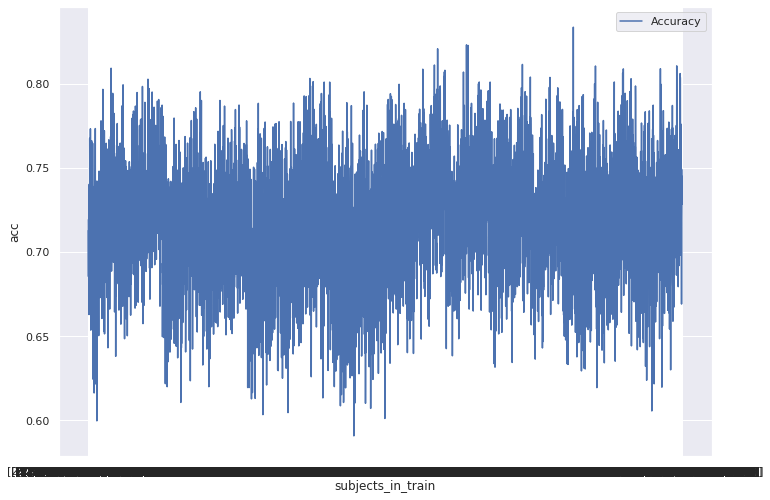

In [14]:
bx = sns.lineplot(x="subjects_in_train", y="acc",data=df_plot_combi ,label="Accuracy")


In [17]:
mean(df_plot_combi['acc'])

0.7183916356532161

In [18]:
max(df_plot_combi['acc'])

0.8336192109777015

In [19]:
min(df_plot_combi['acc'])

0.5907473309608541

# Best Accuracy Across Models

In [59]:
temp = df_plot_combi[df_plot_combi['acc']>=max(df_plot_combi['acc'])]
temp

,subjects_in_train,subjects_in_test,acc
5158,"[4, 5, 6, 7, 8, 9, 11, 17]","[2, 3, 10, 13, 14, 15, 16]",0.833619


# Getting the Best Accuracy

In [62]:
temp = df_plot_combi[df_plot_combi['acc']>=max(df_plot_combi['acc'])]

subjects_in_train = eval(temp['subjects_in_train'].values[0])
subjects_in_test = eval(temp['subjects_in_test'].values[0])

train= df_new_1.loc[df_new_1.subject.isin(subjects_in_train)]
test= df_new_1.loc[df_new_1.subject.isin(subjects_in_test)]


In [66]:
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[sel_fea])
scaled_data_test = scaler.transform(test[sel_fea])


In [67]:
#extra tree

loc_acc = []
for i in range (101):
    clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=i)
    clf.fit(scaled_data_train,train['label'])
    y_pred=clf.predict(scaled_data_test)
    #print (classification_report(test['label'],y_pred))

    rpt = classification_report(test['label'],y_pred,output_dict=True)['accuracy']
    loc_acc.append(rpt)

index = loc_acc.index(max(loc_acc)) 

clf = ExtraTreesClassifier(n_estimators=100,n_jobs=10,random_state=index)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
print (classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       145
           1       0.91      0.99      0.95       151
           2       0.70      0.96      0.81       142
           3       0.89      0.74      0.81       145

    accuracy                           0.84       583
   macro avg       0.85      0.84      0.83       583
weighted avg       0.86      0.84      0.84       583



In [69]:
#random forest

loc_acc = []
for i in range (101):
    clf=RandomForestClassifier(n_estimators=50,random_state=i)
    clf.fit(scaled_data_train,train['label'])
    y_pred=clf.predict(scaled_data_test)
    #print (classification_report(test['label'],y_pred))

    rpt = classification_report(test['label'],y_pred,output_dict=True)['accuracy']
    loc_acc.append(rpt)

index = loc_acc.index(max(loc_acc)) 

clf=RandomForestClassifier(n_estimators=50,random_state=index)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
print (classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       145
           1       0.90      0.94      0.92       151
           2       0.69      0.74      0.71       142
           3       0.72      0.77      0.74       145

    accuracy                           0.79       583
   macro avg       0.79      0.79      0.79       583
weighted avg       0.80      0.79      0.79       583



In [70]:
#Decision-Tree

loc_acc = []
for i in range (101):
    clf= DecisionTreeClassifier(random_state=i)
    clf.fit(scaled_data_train,train['label'])
    y_pred=clf.predict(scaled_data_test)
    #print (classification_report(test['label'],y_pred))

    rpt = classification_report(test['label'],y_pred,output_dict=True)['accuracy']
    loc_acc.append(rpt)

index = loc_acc.index(max(loc_acc)) 

clf= DecisionTreeClassifier(random_state=index)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
print (classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       145
           1       0.85      0.93      0.89       151
           2       0.70      0.66      0.68       142
           3       0.62      0.57      0.59       145

    accuracy                           0.68       583
   macro avg       0.68      0.68      0.68       583
weighted avg       0.68      0.68      0.68       583



In [83]:
#GradientBoosting

loc_acc = []
for i in range (101):
    clf= GradientBoostingClassifier(random_state=i)
    clf.fit(scaled_data_train,train['label'])
    y_pred=clf.predict(scaled_data_test)
    #print (classification_report(test['label'],y_pred))

    rpt = classification_report(test['label'],y_pred,output_dict=True)['accuracy']
    loc_acc.append(rpt)

index = loc_acc.index(max(loc_acc)) 

clf= GradientBoostingClassifier(random_state=index)
clf.fit(scaled_data_train,train['label'])
y_pred=clf.predict(scaled_data_test)
print (classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       145
           1       0.88      0.95      0.92       151
           2       0.71      0.80      0.75       142
           3       0.77      0.79      0.78       145

    accuracy                           0.81       583
   macro avg       0.81      0.81      0.81       583
weighted avg       0.81      0.81      0.81       583

